# **Der beste Bezirk Hamburgs**

## Data Import & Transformation

In [1]:
# importe
import pandas as pd
import warnings

# show all columns
pd.set_option('display.max_columns', None)

# supress unnecessary warning
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
warnings.simplefilter(action='ignore', category=pd.core.common.SettingWithCopyWarning)

### Stadtteilprofile
Quelle: https://www.statistik-nord.de/zahlen-fakten/regionalstatistik-datenbanken-und-karten/hamburger-stadtteil-profile-staedtestatistik-fuer-hamburg*

#### Import

In [2]:
# import data
data_stadtteile_GESAMT = pd.read_excel('https://www.statistik-nord.de/fileadmin/Dokumente/NORD.regional/Stadtteilprofile2021.xlsx', header=1, index_col=0)

#### Transformation

In [3]:
# nur Einträge der Bezirke auswählen
data_stadtteile_GESAMT = data_stadtteile_GESAMT.tail(8).head(7)

# nicht essentielle Attribute ausschließen
data_stadtteile_GESAMT.drop(columns=['Unter 18-Jährige', ' 65-Jährige und Ältere', 'Ausländer:innen', 'Anteil der Ausländer:innen in %', 'Bevölkerung mit Migrations-hintergrund',
    'Anteil der Bevölkerung mit Migrations-hintergrund in %', 'Unter 18-Jährige mit Migrations-hintergrund', 'Anteil der unter 18-Jährigen mit Migrations-hintergrund in %', 'Haushalte', 'Einpersonen-haushalte', 
    'Haushalte mit Kindern', 'Alleinerziehende', 'Geburten', 'Sterbefälle', 'Zuzüge', 'Fortzüge', 'Wanderungssaldo', 'Sozial-versicherungs-pflichtig Beschäftigte (Dez 2020)', 
    'Arbeitslose (Dez 2020)', 'Jüngere Arbeitslose (Dez 2020)', 'Ältere Arbeitslose (Dez 2020)', 'Leistungs-empfänger:innen nach SGB II (Dez 2020)', 
    'Unter 15-Jährige in Mindestsicherung (Dez 2020)', 'Bedarfs-gemeinschaften nach SGB II (Dez 2020)', 'Grundsicherung im Alter der 65-Jährigen und Älteren', 
    'Wohnungen in Ein- und Zweifamilien-häusern (2020)', 'Sozialwohnungen (Jan 2021)', 'Sozialwohnungen mit Bindungsauslauf bis 2026', 'Sozialwohnungen mit Bindungsauslauf bis 2026 in %', 
    'Preise für Grundstücke in EUR/m² (Jan 2021)', 'Preise für Ein- bzw Zwei-familienhäuser in EUR/m² (Jan 2021)', 'Preise für Eigentums-wohnungen in EUR/m² (Jan 2021)', 
    'Schüler:innen der Sekundarstufe I (2020/2021)', 'Allgemeinärzte:innen (Jan 2021)', 'Zahnärzte:innen (Dez 2020)', 'in % der 65-Jährigen und Älteren', 'Private PKW (Jan 2021)', 'Elektro-PKW  (Jan 2021)'],
    inplace=True)

# relevante Attribute umbenennen
data_stadtteile_GESAMT.rename(columns={
    "Bevölkerung" : "Anzahl Einwohner:innen",
    'Anteil der unter 18-Jährigen in %' : 'Anteil U18',
    'Anteil der 65-Jährigen und Älteren in %' : 'Anteil Ü65',
    'Anteil der Ausländer:innen in %' : 'Anteil Ausländer*innen',
    'Anteil der Bevölkerung mit Migrations-hintergrund in %' : 'Anteil mit Migrationshintergrund',
    'Anteil der Einpersonen-haushalte in %' : 'Anteil Einpersonenhaushalte'},
    inplace=True)

# Zeilen- und Spaltenachsen-Namen anpassen
data_stadtteile_GESAMT = data_stadtteile_GESAMT.rename_axis('Bezirk').rename_axis(None, axis='columns')

# Datentypen ändern: numerisch
data_stadtteile_GESAMT = data_stadtteile_GESAMT.apply(pd.to_numeric)

# round numbers
data_stadtteile_GESAMT = data_stadtteile_GESAMT.round(2)

# present data
data_stadtteile_GESAMT

,Anzahl Einwohner:innen,Anteil U18,Anteil Ü65,Personen je Haushalt,Anteil Einpersonenhaushalte,Anteil der Haushalte mit Kindern in %,Anteil der Haushalte von Alleinerziehenden in %,Fläche in km²,Bevölkerungs-dichte,Beschäftigten-quote in % (Dez 2020),Arbeitslosenanteil in % (Dez 2020),Arbeitslosenanteil Jüngerer in % (Dez 2020),Arbeitslosenanteil Älterer in % (Dez 2020),Anteil der Leistungs-empfänger:innen nach SGB II in % (Dez 2020),Anteil der unter 15-Jährigen in Mindestsicherung in % (Dez 2020),Wohngebäude (2020),Wohnungen (2020),Bezugsfertige Wohnungen (2020),Anteil der Wohnungen in Ein- und Zweifamilien-häusern in % (2020),Wohnungsgröße in m² (2020),Wohnfläche je Einwohner:in in m² (2020),Sozialwohnungs-anteil in % (Jan 2021),Kindergärten und Vorschulklassen (März 2021),Grundschulen (2020/2021),Anteil der Schüler:innen in Stadtteilschulen in % (2020/2021),Anteil der Schüler:innen in Gymnasien in % (2020/2021),Niedergelassene Ärzte:innen (Jan 2021),Apotheken (Dez 2020),PKW-Dichte (Jan 2021)
Bezirk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Hamburg-Mitte,301231,16.2,14.3,1.8,57.8,16.9,28.4,142.3,2117,57.4,8.3,4.5,7.9,15.8,32.1,24345,148820,1304,9.0,66.3,32.7,13.9,149,30,64.8,30.4,779,69,265
Altona,275664,18.0,17.9,1.8,53.6,19.8,23.9,77.9,3538,57.4,6.3,2.9,5.9,9.0,15.6,38439,140345,2228,21.1,80.9,41.2,6.5,205,31,43.5,51.4,879,59,334
Eimsbüttel,269118,15.5,18.7,1.7,57.0,16.7,22.4,49.8,5403,61.8,5.2,2.5,5.4,6.4,12.0,32607,145135,1500,15.5,76.3,41.2,4.0,202,29,39.0,57.1,927,57,340
Hamburg-Nord,315514,13.9,16.1,1.6,62.5,14.1,23.8,57.8,5462,64.4,5.3,2.7,5.7,7.0,13.1,31725,182712,1907,9.2,68.8,39.8,4.8,197,25,44.4,52.5,1068,73,319
Wandsbek,442702,17.5,21.5,1.9,48.6,19.7,23.6,147.5,3001,60.3,6.1,3.2,5.7,9.3,18.7,79572,220011,2531,31.0,83.7,41.6,7.2,245,53,48.6,47.0,834,80,398
Bergedorf,130994,18.3,18.8,2.0,43.9,21.7,24.7,154.7,847,61.8,5.8,2.8,5.1,10.3,21.1,22440,60485,1043,32.7,83.5,38.6,12.9,68,18,57.8,38.8,221,22,398
Harburg,169221,18.4,17.8,1.9,49.3,20.4,24.1,125.1,1353,59.5,7.5,4.2,6.1,13.0,25.7,27145,79201,756,28.9,77.7,36.3,9.4,86,20,56.6,35.5,293,29,342


In [4]:
data_rest = data_stadtteile_GESAMT.loc[:,["Grundschulen (2020/2021)", "Niedergelassene Ärzte:innen (Jan 2021)", "Apotheken (Dez 2020)", "PKW-Dichte (Jan 2021)"]]
data_rest.rename({"Grundschulen (2020/2021)":"Grundschulen", "Niedergelassene Ärzte:innen (Jan 2021)":"Niedergelassene Ärzte:innen", "Apotheken (Dez 2020)":"Apotheken",
                    "PKW-Dichte (Jan 2021)":"PKW-Dichte"}, axis=1, inplace=True)
data_rest.rename_axis("Rest", axis=1, inplace=True)
data_rest

Rest,Grundschulen,Niedergelassene Ärzte:innen,Apotheken,PKW-Dichte
Bezirk,,,,
Hamburg-Mitte,30,779,69,265
Altona,31,879,59,334
Eimsbüttel,29,927,57,340
Hamburg-Nord,25,1068,73,319
Wandsbek,53,834,80,398
Bergedorf,18,221,22,398
Harburg,20,293,29,342


In [5]:
data_wohnen = data_stadtteile_GESAMT.loc[:,["Fläche in km²", "Bevölkerungs-dichte", "Wohnungen (2020)", "Bezugsfertige Wohnungen (2020)", "Anteil der Wohnungen in Ein- und Zweifamilien-häusern in % (2020)",
                "Wohnungsgröße in m² (2020)", "Wohnfläche je Einwohner:in in m² (2020)", "Sozialwohnungs-anteil in % (Jan 2021)"]]
data_wohnen.rename({"Wohnungen (2020)":"Wohnungen", "Bezugsfertige Wohnungen (2020)":"Bezugsfertige Wohnungen", "Anteil der Wohnungen in Ein- und Zweifamilien-häusern in % (2020)":"Anteil der Wohnungen in Ein- und Zweifamilien-häusern in %",
                    "Wohnungsgröße in m² (2020)":"Wohnungsgröße in m²", "Wohnfläche je Einwohner:in in m² (2020)":"Wohnfläche je Einwohner:in in m²", "Sozialwohnungs-anteil in % (Jan 2021)":"Sozialwohnungsanteil in %", "Bevölkerungs-dichte":"Bevölkerungsdichte"},
                    axis=1, inplace=True)
data_wohnen.rename_axis("Wohnen", axis=1, inplace=True)
data_wohnen

Wohnen,Fläche in km²,Bevölkerungsdichte,Wohnungen,Bezugsfertige Wohnungen,Anteil der Wohnungen in Ein- und Zweifamilien-häusern in %,Wohnungsgröße in m²,Wohnfläche je Einwohner:in in m²,Sozialwohnungsanteil in %
Bezirk,,,,,,,,
Hamburg-Mitte,142.3,2117,148820,1304,9.0,66.3,32.7,13.9
Altona,77.9,3538,140345,2228,21.1,80.9,41.2,6.5
Eimsbüttel,49.8,5403,145135,1500,15.5,76.3,41.2,4.0
Hamburg-Nord,57.8,5462,182712,1907,9.2,68.8,39.8,4.8
Wandsbek,147.5,3001,220011,2531,31.0,83.7,41.6,7.2
Bergedorf,154.7,847,60485,1043,32.7,83.5,38.6,12.9
Harburg,125.1,1353,79201,756,28.9,77.7,36.3,9.4


In [6]:
data_wohlstand = data_stadtteile_GESAMT.loc[:,["Beschäftigten-quote in % (Dez 2020)", "Arbeitslosenanteil in % (Dez 2020)", "Arbeitslosenanteil Jüngerer in % (Dez 2020)", "Arbeitslosenanteil Älterer in % (Dez 2020)",
                    "Anteil der Leistungs-empfänger:innen nach SGB II in % (Dez 2020)", "Anteil der unter 15-Jährigen in Mindestsicherung in % (Dez 2020)", "Anteil der Schüler:innen in Stadtteilschulen in % (2020/2021)",
                    "Anteil der Schüler:innen in Gymnasien in % (2020/2021)"]]

data_wohlstand.rename({"Beschäftigten-quote in % (Dez 2020)":"Beschäftigten-quote in %", "Arbeitslosenanteil in % (Dez 2020)":"Arbeitslosenanteil in %", "Arbeitslosenanteil Jüngerer in % (Dez 2020)":"Arbeitslosenanteil Jüngerer in %", "Arbeitslosenanteil Älterer in % (Dez 2020)":"Arbeitslosenanteil Älterer in %",
                    "Anteil der Leistungs-empfänger:innen nach SGB II in % (Dez 2020)":"Anteil der Leistungs-empfänger:innen nach SGB II in %", "Anteil der unter 15-Jährigen in Mindestsicherung in % (Dez 2020)":"Anteil der unter 15-Jährigen in Mindestsicherung in %", "Anteil der Schüler:innen in Stadtteilschulen in % (2020/2021)":"Anteil der Schüler:innen in Stadtteilschulen in %",
                    "Anteil der Schüler:innen in Gymnasien in % (2020/2021)":"Anteil der Schüler:innen in Gymnasien in %"}, axis=1, inplace=True)

data_wohlstand.rename_axis("Wohlstand", axis=1, inplace=True)
data_wohlstand

Wohlstand,Beschäftigten-quote in %,Arbeitslosenanteil in %,Arbeitslosenanteil Jüngerer in %,Arbeitslosenanteil Älterer in %,Anteil der Leistungs-empfänger:innen nach SGB II in %,Anteil der unter 15-Jährigen in Mindestsicherung in %,Anteil der Schüler:innen in Stadtteilschulen in %,Anteil der Schüler:innen in Gymnasien in %
Bezirk,,,,,,,,
Hamburg-Mitte,57.4,8.3,4.5,7.9,15.8,32.1,64.8,30.4
Altona,57.4,6.3,2.9,5.9,9.0,15.6,43.5,51.4
Eimsbüttel,61.8,5.2,2.5,5.4,6.4,12.0,39.0,57.1
Hamburg-Nord,64.4,5.3,2.7,5.7,7.0,13.1,44.4,52.5
Wandsbek,60.3,6.1,3.2,5.7,9.3,18.7,48.6,47.0
Bergedorf,61.8,5.8,2.8,5.1,10.3,21.1,57.8,38.8
Harburg,59.5,7.5,4.2,6.1,13.0,25.7,56.6,35.5


In [7]:
data_bevoelkerung = data_stadtteile_GESAMT.loc[:,["Anzahl Einwohner:innen", "Anteil U18", "Anteil Ü65", "Personen je Haushalt",
                    "Anteil Einpersonenhaushalte", "Anteil der Haushalte mit Kindern in %", "Anteil der Haushalte von Alleinerziehenden in %"]]
data_bevoelkerung.rename_axis("Bevölkerung", axis=1, inplace=True)
data_bevoelkerung

Bevölkerung,Anzahl Einwohner:innen,Anteil U18,Anteil Ü65,Personen je Haushalt,Anteil Einpersonenhaushalte,Anteil der Haushalte mit Kindern in %,Anteil der Haushalte von Alleinerziehenden in %
Bezirk,,,,,,,
Hamburg-Mitte,301231,16.2,14.3,1.8,57.8,16.9,28.4
Altona,275664,18.0,17.9,1.8,53.6,19.8,23.9
Eimsbüttel,269118,15.5,18.7,1.7,57.0,16.7,22.4
Hamburg-Nord,315514,13.9,16.1,1.6,62.5,14.1,23.8
Wandsbek,442702,17.5,21.5,1.9,48.6,19.7,23.6
Bergedorf,130994,18.3,18.8,2.0,43.9,21.7,24.7
Harburg,169221,18.4,17.8,1.9,49.3,20.4,24.1


### Bodenflächen
Quelle: https://www.statistik-nord.de/zahlen-fakten/gebiet-flaeche/gebietsgliederung-hamburg/dokumentenansicht/product/2063/bodenflaechen-in-hamburg-179?cHash=145f2f7eed1f28331753565dc1a52fe0*

#### Import

In [8]:
data_bodenflaechen = pd.read_excel('https://www.statistik-nord.de/fileadmin/Dokumente/Statistische_Berichte/andere_statistiken/A_V_1_H_gebiet_flaeche/A_V_1_j21_HH.xlsx', 
                                    sheet_name=7, index_col=1, nrows=13, skiprows=2, header=0)

#### Transformation

In [9]:
data_bodenflaechen = data_bodenflaechen.dropna(axis="index")
data_bodenflaechen = data_bodenflaechen.drop("Schlüsselnummer", axis=1)
data_bodenflaechen.columns = ["Bodenfläche gesamt", "Siedlung", "Verkehr", "Vegetation", "Gewässer"]
data_bodenflaechen = data_bodenflaechen.rename_axis("Bezirk").rename_axis("Bodenflächen", axis='columns')
data_bodenflaechen

Bodenflächen,Bodenfläche gesamt,Siedlung,Verkehr,Vegetation,Gewässer
Bezirk,,,,,
Hamburg-Mitte,14226.4985,6584.4206,2213.0122,2025.1554,3403.9103
Altona,7790.6604,4826.8992,948.269,1369.4811,646.0111
Eimsbüttel,4980.6513,3353.8431,915.2925,611.7179,99.7978
Hamburg-Nord,5776.6994,3912.1322,1502.9831,176.746,184.8381
Wandsbek,14752.3962,8488.0499,1642.6518,4418.3227,203.3718
Bergedorf,15471.7233,3924.2036,937.5315,9508.0332,1101.955
Harburg,12510.7409,4074.0239,1110.6677,6753.1197,572.9296


In [10]:
# append columns with percentage data for later analysis
for column in data_bodenflaechen.columns:
    percentages = []
    for bezirk in data_bodenflaechen.index:
        percentage = data_bodenflaechen.loc[bezirk, column] / data_bodenflaechen.loc[bezirk, "Bodenfläche gesamt"] * 100
        percentages.append(percentage)
    data_bodenflaechen["Anteil " + column] = percentages

data_bodenflaechen.drop(["Bodenfläche gesamt", "Siedlung", "Verkehr", "Vegetation", "Gewässer", "Anteil Bodenfläche gesamt"], axis=1, inplace=True)

# Datentypen ändern: numerisch
data_bodenflaechen = data_bodenflaechen.apply(pd.to_numeric)
# round numbers
data_bodenflaechen = data_bodenflaechen.round(2)

data_bodenflaechen

Bodenflächen,Anteil Siedlung,Anteil Verkehr,Anteil Vegetation,Anteil Gewässer
Bezirk,,,,
Hamburg-Mitte,46.28,15.56,14.24,23.93
Altona,61.96,12.17,17.58,8.29
Eimsbüttel,67.34,18.38,12.28,2.00
Hamburg-Nord,67.72,26.02,3.06,3.20
Wandsbek,57.54,11.13,29.95,1.38
Bergedorf,25.36,6.06,61.45,7.12
Harburg,32.56,8.88,53.98,4.58


### Siedlungsflächen
Quelle: https://www.statistik-nord.de/zahlen-fakten/gebiet-flaeche/gebietsgliederung-hamburg/dokumentenansicht/product/2063/bodenflaechen-in-hamburg-179?cHash=145f2f7eed1f28331753565dc1a52fe0*

#### Import

In [11]:
# import data
data_siedlungsflaechen = pd.read_excel('https://www.statistik-nord.de/fileadmin/Dokumente/Statistische_Berichte/andere_statistiken/A_V_1_H_gebiet_flaeche/A_V_1_j21_HH.xlsx', 
                                        sheet_name=8, index_col=1, nrows=14, skiprows=2, header=0, decimal=",")

#### Transformation

In [12]:
data_siedlungsflaechen = data_siedlungsflaechen.dropna(axis="index")
data_siedlungsflaechen = data_siedlungsflaechen.drop(["Schl.-Nr.", "Schl.-Nr..1", "Bezirk\nLand.1", "Bodenfläche insgesamt"], axis=1)
data_siedlungsflaechen.columns = ["Siedlungsfläche gesamt", "Wohnen", "Industrie- und Gewerbefläche", "Halde", "Bergbaubetrieb", "Tagebau, Grube, Steinbruch", 
    "Fläche gemischter Nutzung", "Fläche besonderer funktionaler Prägung", "Sport-,Freizeit und Erholungsfläche gesamt", "darunter Grünanlagen", "Friedhof"]
data_siedlungsflaechen = data_siedlungsflaechen.rename_axis("Bezirk").rename_axis("Siedlungsflächen", axis='columns')
data_siedlungsflaechen

# present data
data_siedlungsflaechen

Siedlungsflächen,Siedlungsfläche gesamt,Wohnen,Industrie- und Gewerbefläche,Halde,Bergbaubetrieb,"Tagebau, Grube, Steinbruch",Fläche gemischter Nutzung,Fläche besonderer funktionaler Prägung,"Sport-,Freizeit und Erholungsfläche gesamt",darunter Grünanlagen,Friedhof
Bezirk,,,,,,,,,,,
Hamburg-Mitte,6584.4206,1484.6203,3242.429,0.3825,0,0,216.9702,353.2118,1153.1722,963.6553,133.6346
Altona,4826.8992,2629.9845,469.4358,0.3521,0,0,141.0612,404.5551,1049.0242,776.9651,132.4863
Eimsbüttel,3353.8431,1970.3931,352.1383,0,0,0,182.6733,240.4048,580.915,438.8092,27.3186
Hamburg-Nord,3912.1322,1796.3584,334.2966,0.0875,0,0,162.2788,371.7809,853.5969,755.5449,393.7331
Wandsbek,8488.0499,5666.2321,664.6325,0,0,0,281.6782,486.6481,1332.7713,974.5303,56.0877
Bergedorf,3924.2036,1603.592,775.3461,0.6727,0,22.4558,345.6594,259.9232,890.7392,629.5523,25.8152
Harburg,4074.0239,1813.7594,1166.7749,1.2058,0,6.5144,200.8416,179.3343,635.4831,515.0413,70.1104


In [13]:
# append columns with percentage data for later analysis
data_siedlungsflaechen.drop(columns=["darunter Grünanlagen", "Fläche gemischter Nutzung", "Halde", "Bergbaubetrieb","Tagebau, Grube, Steinbruch", 
                                        "Fläche besonderer funktionaler Prägung"], inplace=True)
for column in data_siedlungsflaechen.columns:
    percentages = []
    for bezirk in data_siedlungsflaechen.index:
        percentage = data_siedlungsflaechen.loc[bezirk, column] / data_siedlungsflaechen.loc[bezirk, "Siedlungsfläche gesamt"] * 100
        percentages.append(percentage)
    data_siedlungsflaechen["Anteil " + column] = percentages

data_siedlungsflaechen.rename({"Anteil Sport-,Freizeit und Erholungsfläche gesamt" : "Anteil Sport-, Freizeit und Erholungsfläche"}, axis=1, inplace=True)
data_siedlungsflaechen.drop(["Siedlungsfläche gesamt", "Wohnen", "Industrie- und Gewerbefläche", "Sport-,Freizeit und Erholungsfläche gesamt", 
                            "Friedhof", "Anteil Siedlungsfläche gesamt"], axis=1, inplace=True)

# Datentypen ändern: numerisch
data_siedlungsflaechen = data_siedlungsflaechen.apply(pd.to_numeric)
# round numbers
data_siedlungsflaechen = data_siedlungsflaechen.round(2)

data_siedlungsflaechen

Siedlungsflächen,Anteil Wohnen,Anteil Industrie- und Gewerbefläche,"Anteil Sport-, Freizeit und Erholungsfläche",Anteil Friedhof
Bezirk,,,,
Hamburg-Mitte,22.55,49.24,17.51,2.03
Altona,54.49,9.73,21.73,2.74
Eimsbüttel,58.75,10.50,17.32,0.81
Hamburg-Nord,45.92,8.55,21.82,10.06
Wandsbek,66.76,7.83,15.70,0.66
Bergedorf,40.86,19.76,22.70,0.66
Harburg,44.52,28.64,15.60,1.72


### Einzelhandel - Nahversorgung - Hamburg
Quelle: https://suche.transparenz.hamburg.de/dataset/einzelhandel-nahversorgung-hamburg6?forceWeb=true*
- Datensatzbeschreibungen: 
    - Einzelhandel https://metaver.de/trefferanzeige?docuuid=BE6F18E8-CA2D-42A8-8FDE-7C3EB42255DE#detail_description
    - Gastro, Freizeit, DL https://metaver.de/trefferanzeige?docuuid=BE6F18E8-CA2D-42A8-8FDE-7C3EB42255DE
- API's:
    - Einzelhandel https://api.hamburg.de/datasets/v1/einzelhandel
    - Gastro, Freizeit, DL https://api.hamburg.de/datasets/v1/einzelhandel_zvb

#### Import (muss nur EINMAL ausgeführt werden!)

In [14]:
# # get the data
# import requests

# # einzelhandel
# handel_1 = requests.get('https://api.hamburg.de/datasets/v1/einzelhandel/collections/drogeriemarkt/items?bulk=true&f=json') # Bsp: BUDNI, Rossmann
# handel_2 = requests.get('https://api.hamburg.de/datasets/v1/einzelhandel/collections/supermarkt/items?bulk=true&f=json') # Bsp: EDEKA, REWE
# handel_3 = requests.get('https://api.hamburg.de/datasets/v1/einzelhandel/collections/discounter/items?bulk=true&f=json') # Bsp: ALDI, Penny
# handel_4 = requests.get('https://api.hamburg.de/datasets/v1/einzelhandel/collections/wochenmarkt/items?bulk=true&f=json') # Bsp: Wochenmärkte
# handel_5 = requests.get('https://api.hamburg.de/datasets/v1/einzelhandel/collections/sbwarenhaus/items?bulk=true&f=json') # Bsp: Marktkauf, Kaufland
# handel_6 = requests.get('https://api.hamburg.de/datasets/v1/einzelhandel/collections/uebriger_nahversorgungsrelevanter_anbieter/items?bulk=true&f=json') # Bsp: kleine Supermärkte, Parfümerien, Apotheken, Fachgeschäfte (für Tee, Kaffee,...)
# handel_7 = requests.get('https://api.hamburg.de/datasets/v1/einzelhandel/collections/uebriger_lebensmittelanbieter/items?bulk=true&f=json') # Bsp: Tankstellen, Bäckereien, Kioske

# # gastro
# gastro_1 = requests.get('https://api.hamburg.de/datasets/v1/einzelhandel_zvb/collections/gastro_kneipe_bar/items?bulk=true&f=json') # Kneipen, Bars
# gastro_2 = requests.get('https://api.hamburg.de/datasets/v1/einzelhandel_zvb/collections/gastro_hotels_beherbergung/items?bulk=true&f=json') # Hotels, Beherbergungen
# gastro_3 = requests.get('https://api.hamburg.de/datasets/v1/einzelhandel_zvb/collections/gastro_restaurante_imbiss/items?bulk=true&f=json') # Resturants & Imbisse
# gastro_4 = requests.get('https://api.hamburg.de/datasets/v1/einzelhandel_zvb/collections/gastro_sonstige_gastronomie/items?bulk=true&f=json') # Gastronomiebetriebe mit reinem bzw. überwiegendem Lieferservice, Kantinen u.ä.

# # freizeit
# freizeit_1 = requests.get('https://api.hamburg.de/datasets/v1/einzelhandel_zvb/collections/freizeit_kulturelle_einrichtungen/items?bulk=true&f=json') # Bsp: Theater, Kleinkunstbühnen, Veranstaltungshallen, Museen, Galerien oder Kinos
# freizeit_2 = requests.get('https://api.hamburg.de/datasets/v1/einzelhandel_zvb/collections/freizeit_sport/items?bulk=true&f=json') # Bsp: Fitness-Studios, Kegelbahnen, Schwimmbäder, Tennis-Center

# # dienstleistungen
# dienstleistungen_1 = requests.get('https://api.hamburg.de/datasets/v1/einzelhandel_zvb/collections/dienstleistungen/items?bulk=true&f=json') # Bsp: Arztpraxen, Anwalts- und Ingenieurbüros, Friseure, Reinigungen, Banken, Versicherungen, Post

In [15]:
# # concatenate all relevant data
# data_versorgung_all = handel_1.json()["features"] +  handel_2.json()["features"] + handel_3.json()["features"] + handel_4.json()["features"] + handel_5.json()["features"] + handel_6.json()["features"] + handel_7.json()["features"] + gastro_1.json()["features"] + gastro_2.json()["features"] + gastro_3.json()["features"] + gastro_4.json()["features"] + freizeit_1.json()["features"] + freizeit_2.json()["features"] + dienstleistungen_1.json()["features"]

#### JSON-Export (muss nur EINMAL ausgeführt werden!)

In [16]:
# # export data json
# import json
# with open('data_einzelhandel.json', 'w', encoding='utf-8') as f:
#     json.dump(data_versorgung_all, f, ensure_ascii=False, indent=4)

#### JSON-Import

In [17]:
# import data json
import json
with open('data_einzelhandel.json', encoding='utf-8') as f:
   data_versorgung_all = json.load(f)

#### Transformation

In [18]:
# key-value-transformations

import re

for entry in data_versorgung_all:
    
    # bezirke bereinigen 
    if entry["properties"]["bezirk"] == "HH-Mitte" or entry["properties"]["bezirk"] == "Mitte":
        entry["properties"]["bezirk"] = "Hamburg-Mitte"
    elif entry["properties"]["bezirk"] == "HH_Nord":
        entry["properties"]["bezirk"] = "Hamburg-Nord"
    elif entry["properties"]["bezirk"] == "EimsbÃ¼ttel":
        entry["properties"]["bezirk"] = "Eimsbüttel"
        
    # retrieve bezirk and type of handel
    entry["bezirk"] = entry["properties"]["bezirk"]
    entry["kategorie"] = re.split('\d+', entry["id"])[0][9:-1]

    # remove remaining keys
    entry.pop("properties", None)
    entry.pop("type", None)
    entry.pop("geometry", None)
    entry.pop("srsName", None)
    entry.pop("id", None)
    
# count the kategorie values per bezirk and save as new dict

bezirke_distinct = list(set(d['bezirk'] for d in data_versorgung_all))
kategorien_distinct = list(set(d['kategorie'] for d in data_versorgung_all))

counts = []
for bezirk in bezirke_distinct:
    dict = {"Bezirk" : bezirk}
    for kategorie in kategorien_distinct:
        dict[kategorie] = sum((i['kategorie'] == kategorie and i['bezirk'] == bezirk) for i in data_versorgung_all)
    counts.append(dict)
    
# save as dataframe
data_versorgung_GESAMT = pd.DataFrame(counts, index=bezirke_distinct)
data_versorgung_GESAMT.drop(columns=["Bezirk"], inplace=True)
data_versorgung_GESAMT.rename_axis('Bezirk', inplace=True)

# to numeric values
data_versorgung_GESAMT = data_versorgung_GESAMT.apply(pd.to_numeric)

# round numbers
data_versorgung_GESAMT = data_versorgung_GESAMT.round(2)

# show result
data_versorgung_GESAMT

,SUPERMARKT,GASTRO_HOTELS_BEHERBERGUNG,GASTRO_KNEIPE_BAR,FREIZEIT_KULTURELLE_EINRICHTUNGEN,DISCOUNTER,UEBRIGER_NAHVERSORGUNGSRELEVANTER_ANBIETER,GASTRO_SONSTIGE_GASTRONOMIE,DROGERIEMARKT,FREIZEIT_SPORT,DIENSTLEISTUNGEN,UEBRIGER_LEBENSMITTELANBIETER,SBWARENHAUS,GASTRO_RESTAURANTE_IMBISS,WOCHENMARKT
Bezirk,,,,,,,,,,,,,,
Hamburg-Nord,40,11,176,16,41,108,23,32,20,1120,419,5,327,14
Harburg,15,10,57,20,26,69,7,12,12,425,223,2,105,2
Eimsbüttel,35,17,155,24,42,71,28,20,20,906,380,0,302,14
Hamburg-Mitte,32,106,442,128,46,179,31,30,26,1048,639,2,665,17
Wandsbek,50,27,132,39,66,107,39,42,48,1235,456,4,256,14
Bergedorf,17,4,32,20,17,66,7,13,10,285,106,2,63,6
Altona,35,15,134,28,30,79,30,29,18,631,382,3,230,13


In [19]:
# split the dataframe into sub-categories
data_lebensmittel_GESAMT = data_versorgung_GESAMT.loc[:, ["DISCOUNTER", "SUPERMARKT", "SBWARENHAUS", "WOCHENMARKT", "UEBRIGER_LEBENSMITTELANBIETER"]]
data_lebensmittel_GESAMT["GESAMT"] = data_lebensmittel_GESAMT.sum(axis=1)

data_nahversorgung = data_versorgung_GESAMT.loc[:, ["DROGERIEMARKT", "DIENSTLEISTUNGEN", "UEBRIGER_NAHVERSORGUNGSRELEVANTER_ANBIETER"]]
data_nahversorgung = pd.merge(data_nahversorgung, data_lebensmittel_GESAMT.loc[:, ["GESAMT"]], on="Bezirk")
data_nahversorgung.rename({"GESAMT":"LEBENSMITTEL"}, axis=1, inplace=True)
data_nahversorgung["GESAMT"] = data_nahversorgung.sum(axis=1)
data_nahversorgung.rename({"UEBRIGER_NAHVERSORGUNGSRELEVANTER_ANBIETER": "UEBRIGER NAHVERSORGUNGSRELEVANTER ANBIETER"}, axis=1, inplace=True)
data_nahversorgung.rename(str.title, axis=1, inplace=True)
data_nahversorgung.rename_axis("Nahversorgung", axis=1, inplace=True)

data_freizeit = data_versorgung_GESAMT.loc[:, ["FREIZEIT_KULTURELLE_EINRICHTUNGEN", "FREIZEIT_SPORT"]]
data_freizeit["GESAMT"] = data_freizeit.sum(axis=1)
data_freizeit.rename({"FREIZEIT_KULTURELLE_EINRICHTUNGEN":"KULTURELLE EINRICHTUNGEN", "FREIZEIT_SPORT":"SPORTANGEBOTE"}, axis=1, inplace=True)
data_freizeit.rename(str.title, axis=1, inplace=True)
data_freizeit.rename_axis("Freizeit", axis=1, inplace=True)

data_gastro = data_versorgung_GESAMT.loc[:, ["GASTRO_RESTAURANTE_IMBISS", "GASTRO_KNEIPE_BAR", "GASTRO_HOTELS_BEHERBERGUNG", "GASTRO_SONSTIGE_GASTRONOMIE"]]
data_gastro["GESAMT"] = data_gastro.sum(axis=1)
data_gastro.rename({"GASTRO_RESTAURANTE_IMBISS":"RESTAURANTE/IMBISSE", "GASTRO_KNEIPE_BAR":"KNEIPEN/BARS", "GASTRO_HOTELS_BEHERBERGUNG":"HOTELS/BEHERBERGUNGEN", 
                    "GASTRO_SONSTIGE_GASTRONOMIE":"SONSTIGE GASTRONOMIE"}, axis=1, inplace=True)
data_gastro.rename(str.title, axis=1, inplace=True)
data_gastro.rename_axis("Gastronomie", axis=1, inplace=True)

In [20]:
data_nahversorgung

Nahversorgung,Drogeriemarkt,Dienstleistungen,Uebriger Nahversorgungsrelevanter Anbieter,Lebensmittel,Gesamt
Bezirk,,,,,
Hamburg-Nord,32,1120,108,519,1779
Harburg,12,425,69,268,774
Eimsbüttel,20,906,71,471,1468
Hamburg-Mitte,30,1048,179,736,1993
Wandsbek,42,1235,107,590,1974
Bergedorf,13,285,66,148,512
Altona,29,631,79,463,1202


In [21]:
data_freizeit

Freizeit,Kulturelle Einrichtungen,Sportangebote,Gesamt
Bezirk,,,
Hamburg-Nord,16,20,36
Harburg,20,12,32
Eimsbüttel,24,20,44
Hamburg-Mitte,128,26,154
Wandsbek,39,48,87
Bergedorf,20,10,30
Altona,28,18,46


In [22]:
data_gastro

Gastronomie,Restaurante/Imbisse,Kneipen/Bars,Hotels/Beherbergungen,Sonstige Gastronomie,Gesamt
Bezirk,,,,,
Hamburg-Nord,327,176,11,23,537
Harburg,105,57,10,7,179
Eimsbüttel,302,155,17,28,502
Hamburg-Mitte,665,442,106,31,1244
Wandsbek,256,132,27,39,454
Bergedorf,63,32,4,7,106
Altona,230,134,15,30,409


### Review

**Hürden bei den Datenintegration**
- unterschiedliche Erhebungszeiten der Datensätze 
    - Stadtteilprofile: 2020
    - Bodennutzung: 2021
    - Einzelhandel: 2016
- unterschiedliche Maßeinheiten (Fläche)
    - Bodennutzung: hektar
    - Stadtteilprofile: m²
- Dateitypen: Stadtteilprofile (Excel), Grünflächen (Excel), Einzelhandel (JSON)
- Granularität begrenzt, da Gemeinsamkeit über alle Datensätze hinweg: Bezirke (nicht Stadtteile)
- Vesorgungs-Datensatz: Synonyme in den Bezirksnamen (HH-Mitte == Mitte == Hamburg-Mitte, Hamburg-Nord == HH_Nord, Eimsbüttel == EimsbÃ¼ttel)
- Groß-/Kleinschreibung: Versorgungs-Datensatz ALLES GROß, andere "normal"
- Unterschiedliche Schnittstellen: HTML-Seite mit Excel vs. REST-API-Request

## Explorative Analyse

### Technisch: DataFrames

In [23]:
# welche Datensätze haben wir nun?
%whos DataFrame

Variable                   Type         Data/Info
-------------------------------------------------
data_bevoelkerung          DataFrame    Bevölkerung    Anzahl Ein<...>                   24.1  
data_bodenflaechen         DataFrame    Bodenflächen   Anteil Sie<...>                   4.58  
data_freizeit              DataFrame    Freizeit       Kulturelle<...>28             18      46
data_gastro                DataFrame    Gastronomie    Restaurant<...>             30     409  
data_lebensmittel_GESAMT   DataFrame                   DISCOUNTER<...>            382     463  
data_nahversorgung         DataFrame    Nahversorgung  Drogeriema<...>\nAltona           1202  
data_rest                  DataFrame    Rest           Grundschul<...>rburg               342  
data_siedlungsflaechen     DataFrame    Siedlungsflächen  Anteil <...> 15.60             1.72  
data_stadtteile_GESAMT     DataFrame                   Anzahl Ein<...>                    342  
data_versorgung_GESAMT     DataFrame

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Stadtteile-Daten

In [25]:
data_stadtteile_GESAMT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Hamburg-Mitte to Harburg
Data columns (total 29 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Anzahl Einwohner:innen                                             7 non-null      int64  
 1   Anteil U18                                                         7 non-null      float64
 2   Anteil Ü65                                                         7 non-null      float64
 3   Personen je Haushalt                                               7 non-null      float64
 4   Anteil Einpersonenhaushalte                                        7 non-null      float64
 5   Anteil der Haushalte mit Kindern in %                              7 non-null      float64
 6   Anteil der Haushalte von Alleinerziehenden in %                    7 non-null      float64
 7   Fläche in km²    

In [26]:
#data_stadtteile_GESAMT.describe()

In [27]:
#ax = data_stadtteile_GESAMT.hist(figsize=(30,30))
#plt.show()

In [28]:
data_stadtteile_GESAMT[["Arbeitslosenanteil in % (Dez 2020)",
                        "Wohnfläche je Einwohner:in in m² (2020)",
                        "PKW-Dichte (Jan 2021)",
                        "Personen je Haushalt",
                        "Bevölkerungs-dichte",
                        "Bezugsfertige Wohnungen (2020)",
                        "Wohnungsgröße in m² (2020)",
                        "Sozialwohnungs-anteil in % (Jan 2021)",
                        "Niedergelassene Ärzte:innen (Jan 2021)",
                        "Apotheken (Dez 2020)"]].describe()

,Arbeitslosenanteil in % (Dez 2020),Wohnfläche je Einwohner:in in m² (2020),PKW-Dichte (Jan 2021),Personen je Haushalt,Bevölkerungs-dichte,Bezugsfertige Wohnungen (2020),Wohnungsgröße in m² (2020),Sozialwohnungs-anteil in % (Jan 2021),Niedergelassene Ärzte:innen (Jan 2021),Apotheken (Dez 2020)
count,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,6.357143,38.771429,342.285714,1.814286,3103.00000,1609.857143,76.742857,8.385714,714.428571,55.571429
std,1.148705,3.262266,46.183382,0.134519,1833.88213,642.250582,6.887152,3.848562,325.787179,22.089644
min,5.200000,32.700000,265.000000,1.600000,847.00000,756.000000,66.300000,4.000000,221.000000,22.000000
25%,5.550000,37.450000,326.500000,1.750000,1735.00000,1173.500000,72.550000,5.650000,536.000000,43.000000
50%,6.100000,39.800000,340.000000,1.800000,3001.00000,1500.000000,77.700000,7.200000,834.000000,59.000000
75%,6.900000,41.200000,370.000000,1.900000,4470.50000,2067.500000,82.200000,11.150000,903.000000,71.000000
max,8.300000,41.600000,398.000000,2.000000,5462.00000,2531.000000,83.700000,13.900000,1068.000000,80.000000


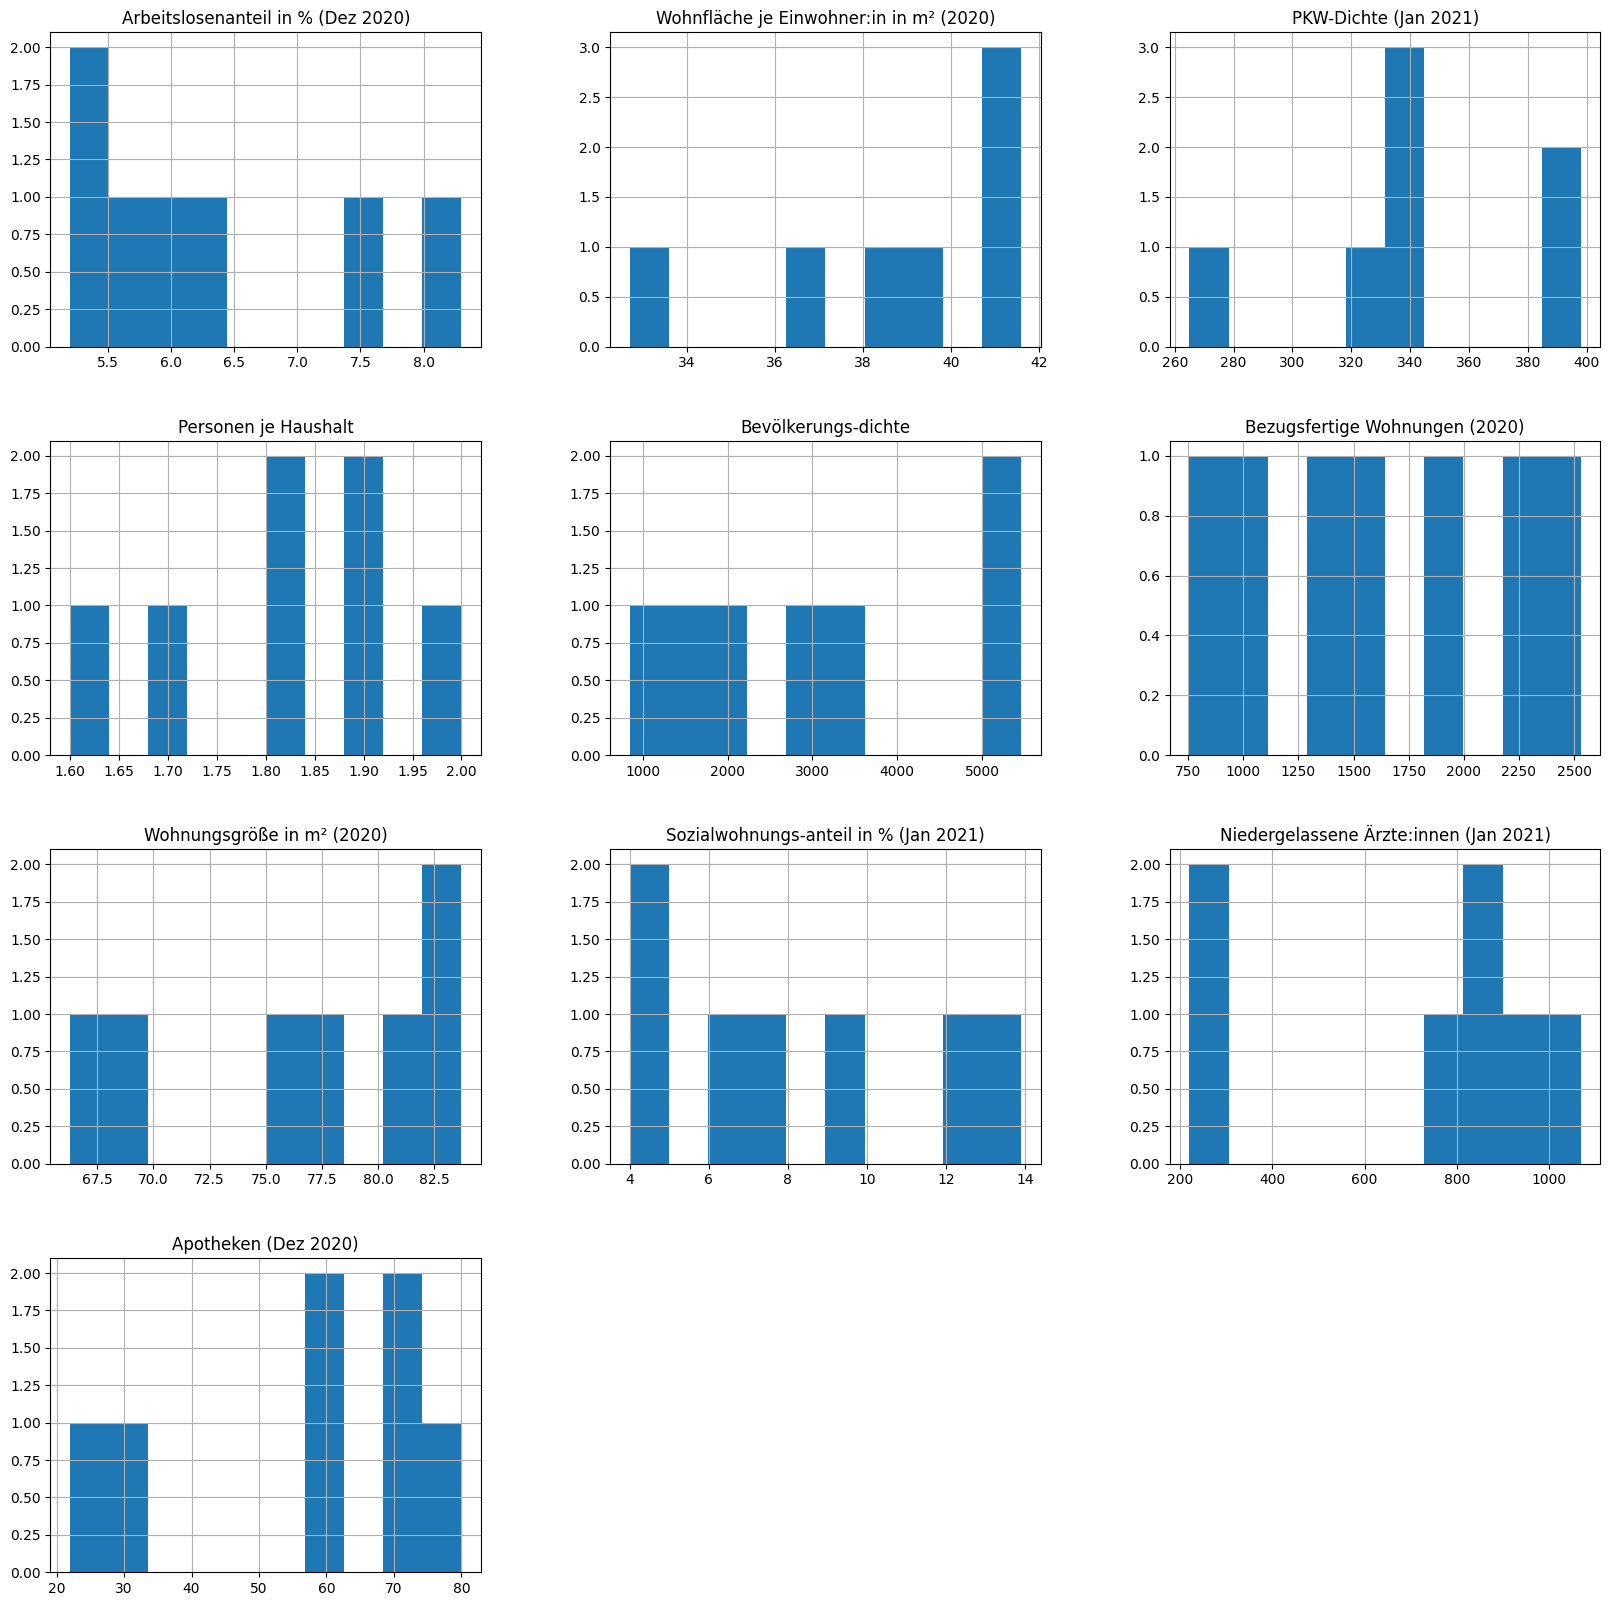

In [29]:
ax = data_stadtteile_GESAMT[["Arbeitslosenanteil in % (Dez 2020)",
                        "Wohnfläche je Einwohner:in in m² (2020)",
                        "PKW-Dichte (Jan 2021)",
                        "Personen je Haushalt",
                        "Bevölkerungs-dichte",
                        "Bezugsfertige Wohnungen (2020)",
                        "Wohnungsgröße in m² (2020)",
                        "Sozialwohnungs-anteil in % (Jan 2021)",
                        "Niedergelassene Ärzte:innen (Jan 2021)",
                        "Apotheken (Dez 2020)"]].hist(figsize=(20,20))
plt.show()

#### Erkenntnis zu Stadtteile-Daten: 
#### Die 10 wichtigsten Attributen

##### Ähnlich zwischen Stadteilen, Differenz zwischen Max & Min ist nicht so groß: 
    - Arbeitslosenanteil in % (Dez 2020)
    - Wohnfläche je Einwohner:in in m² (2020)
    - Personen je Haushalt
    - Wohnungsgröße in m² (2020)
##### Unterschiedlich zwischen Stadteilen, Differenz ist groß:
    - PKW-Dichte (Jan 2021)
    - Bevölkerungs-dichte
    - Bezugsfertige Wohnungen (2020)
    - Sozialwohnungs-anteil in % (Jan 2021)
    - Niedergelassene Ärzte:innen (Jan 2021)
    - Apotheken (Dez 2020)

#### Bodenflächen-Daten

In [30]:
data_bodenflaechen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Hamburg-Mitte to Harburg
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Anteil Siedlung    7 non-null      float64
 1   Anteil Verkehr     7 non-null      float64
 2   Anteil Vegetation  7 non-null      float64
 3   Anteil Gewässer    7 non-null      float64
dtypes: float64(4)
memory usage: 580.0+ bytes


In [31]:
data_bodenflaechen.describe()

Bodenflächen,Anteil Siedlung,Anteil Verkehr,Anteil Vegetation,Anteil Gewässer
count,7.000000,7.000000,7.000000,7.000000
mean,51.251429,14.028571,27.505714,7.214286
std,16.974129,6.670039,22.222328,7.798106
min,25.360000,6.060000,3.060000,1.380000
25%,39.420000,10.005000,13.260000,2.600000
50%,57.540000,12.170000,17.580000,4.580000
75%,64.650000,16.970000,41.965000,7.705000
max,67.720000,26.020000,61.450000,23.930000


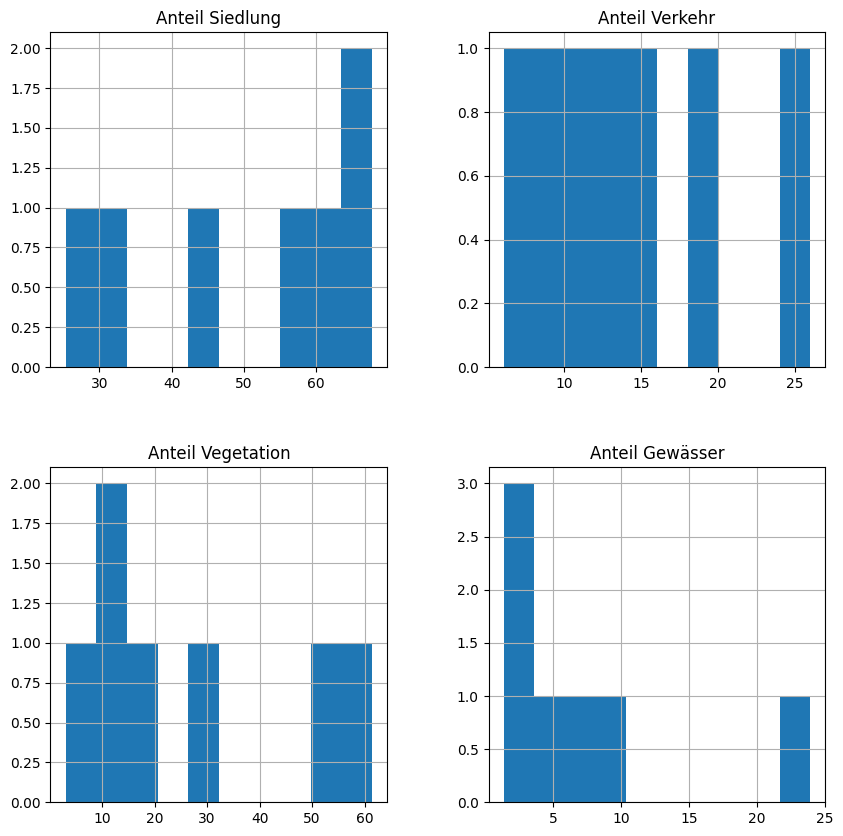

In [32]:
ax = data_bodenflaechen.hist(figsize=(10,10))
plt.show()

#### Erkenntnis zu Bodenflächen-Daten:

##### Unterschiedlich zwischen Stadteilen, Differenz ist sehr groß:
    - Anteil Siedlung: von 25% bis fast 70%
    - Anteil Vegetation: von 3% bis 60%
    - Anteil Gewässer: von 1% bis fast 25%
    - Anteil Verkehr: von 6% bis fast 25%  

##### Der höchsten Anteil von Bodenflächen ist Siedlung, dann ist der Anteil Vegetation.

#### Siedlungsflächen-Daten

In [33]:
data_siedlungsflaechen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Hamburg-Mitte to Harburg
Data columns (total 4 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Anteil Wohnen                                7 non-null      float64
 1   Anteil Industrie- und Gewerbefläche          7 non-null      float64
 2   Anteil Sport-, Freizeit und Erholungsfläche  7 non-null      float64
 3   Anteil Friedhof                              7 non-null      float64
dtypes: float64(4)
memory usage: 580.0+ bytes


In [34]:
data_siedlungsflaechen.describe()

Siedlungsflächen,Anteil Wohnen,Anteil Industrie- und Gewerbefläche,"Anteil Sport-, Freizeit und Erholungsfläche",Anteil Friedhof
count,7.000000,7.000000,7.000000,7.000000
mean,47.692857,19.178571,18.911429,2.668571
std,14.283316,15.274684,3.069552,3.353329
min,22.550000,7.830000,15.600000,0.660000
25%,42.690000,9.140000,16.510000,0.735000
50%,45.920000,10.500000,17.510000,1.720000
75%,56.620000,24.200000,21.775000,2.385000
max,66.760000,49.240000,22.700000,10.060000


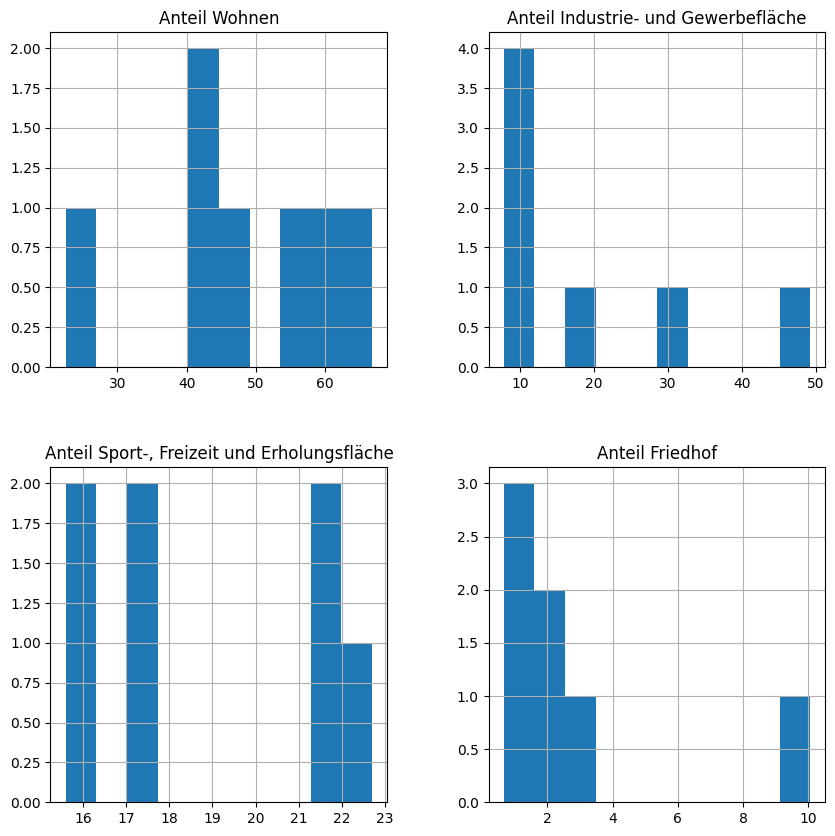

In [35]:
ax = data_siedlungsflaechen.hist(figsize=(10,10))
plt.show()

#### Erkenntnis zu Siedlungsflächen-Daten:

##### Unterschiedlich zwischen Stadteilen, Differenz ist aber weniger groß:
    - Anteil Wohnen: von 25% bis 65%
    - Anteil Industrie- und Gewerbefläche: von 10% bis fast 50%
    - Anteil Friedhof: von 1% bis 10%
    - Anteil Verkehr: wenigsten unterschiedlich mit 15% bis mehr als 20%  

##### Der höchsten Anteil ist Wohnen, der wenigsten ist Friedhof.

#### Nahversorgung-Daten

In [36]:
data_nahversorgung.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Hamburg-Nord to Altona
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Drogeriemarkt                               7 non-null      int64
 1   Dienstleistungen                            7 non-null      int64
 2   Uebriger Nahversorgungsrelevanter Anbieter  7 non-null      int64
 3   Lebensmittel                                7 non-null      int64
 4   Gesamt                                      7 non-null      int64
dtypes: int64(5)
memory usage: 336.0+ bytes


In [37]:
data_nahversorgung.describe()

Nahversorgung,Drogeriemarkt,Dienstleistungen,Uebriger Nahversorgungsrelevanter Anbieter,Lebensmittel,Gesamt
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,25.428571,807.142857,97.000000,456.428571,1386.000000
std,10.921800,364.787348,40.187063,196.131637,584.186329
min,12.000000,285.000000,66.000000,148.000000,512.000000
25%,16.500000,528.000000,70.000000,365.500000,988.000000
50%,29.000000,906.000000,79.000000,471.000000,1468.000000
75%,31.000000,1084.000000,107.500000,554.500000,1876.500000
max,42.000000,1235.000000,179.000000,736.000000,1993.000000


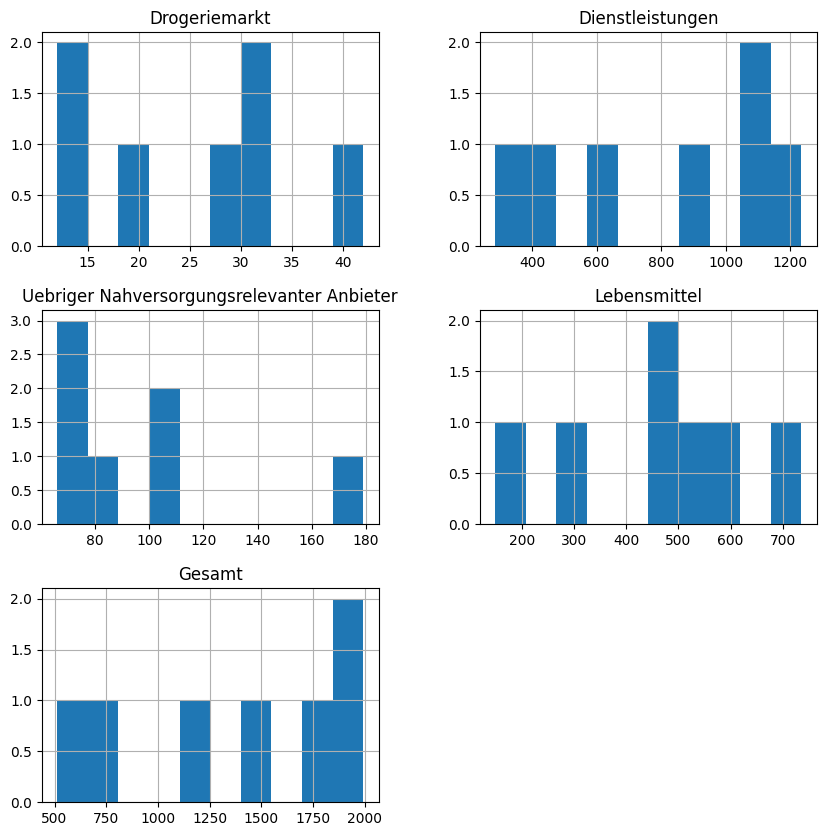

In [38]:
ax = data_nahversorgung.hist(figsize=(10,10))
plt.show()

#### Erkenntnis zu Nahversorgung-Daten:

##### Die Summe ist unterschiedlich zwischen Stadteilen, Differenz ist groß (von 500 bis 2000).

#### Freizeit-Daten

In [39]:
data_freizeit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Hamburg-Nord to Altona
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Kulturelle Einrichtungen  7 non-null      int64
 1   Sportangebote             7 non-null      int64
 2   Gesamt                    7 non-null      int64
dtypes: int64(3)
memory usage: 224.0+ bytes


In [40]:
data_freizeit.describe()

Freizeit,Kulturelle Einrichtungen,Sportangebote,Gesamt
count,7.000000,7.000000,7.000000
mean,39.285714,22.000000,61.285714
std,39.827605,12.649111,45.213251
min,16.000000,10.000000,30.000000
25%,20.000000,15.000000,34.000000
50%,24.000000,20.000000,44.000000
75%,33.500000,23.000000,66.500000
max,128.000000,48.000000,154.000000


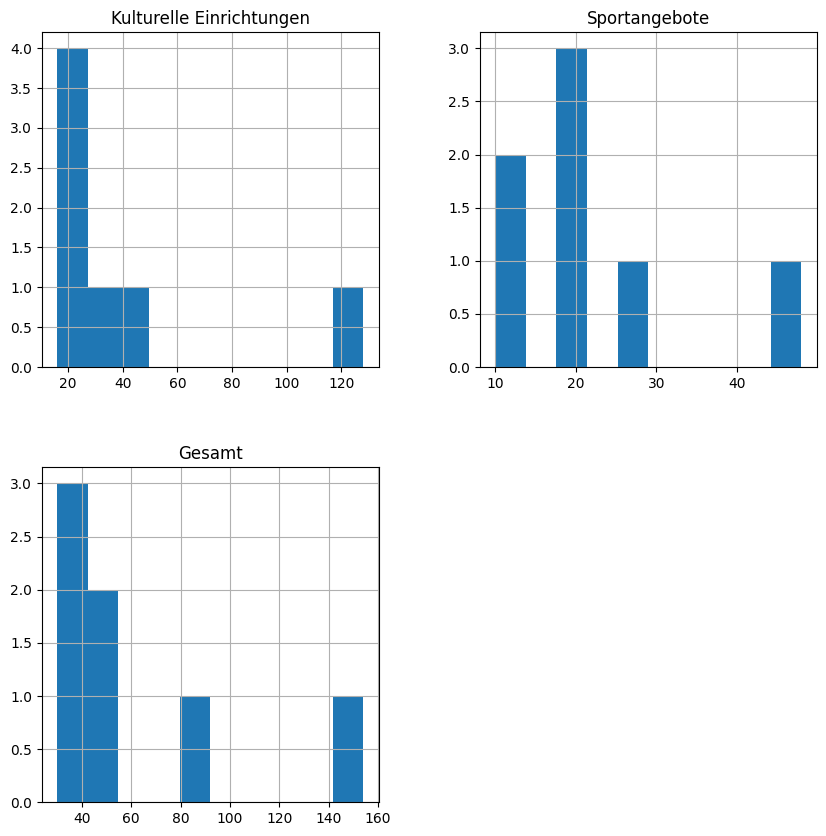

In [41]:
ax = data_freizeit.hist(figsize=(10,10))
plt.show()

#### Erkenntnis zu Freizeit-Daten:

##### Es gibt 1 bis 2 Stadtteile mit besonders höheren Anzahl von Freizeitangeboten. Zwischen den restlichen Stadtteilen ist die Anzal nicht stark unterschiedlich.

#### Gastro-Daten

In [42]:
data_gastro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Hamburg-Nord to Altona
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Restaurante/Imbisse    7 non-null      int64
 1   Kneipen/Bars           7 non-null      int64
 2   Hotels/Beherbergungen  7 non-null      int64
 3   Sonstige Gastronomie   7 non-null      int64
 4   Gesamt                 7 non-null      int64
dtypes: int64(5)
memory usage: 336.0+ bytes


In [43]:
data_gastro.describe()

Gastronomie,Restaurante/Imbisse,Kneipen/Bars,Hotels/Beherbergungen,Sonstige Gastronomie,Gesamt
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,278.285714,161.142857,27.142857,23.571429,490.142857
std,196.505907,134.318562,35.493796,12.272695,370.338327
min,63.000000,32.000000,4.000000,7.000000,106.000000
25%,167.500000,94.500000,10.500000,15.000000,294.000000
50%,256.000000,134.000000,15.000000,28.000000,454.000000
75%,314.500000,165.500000,22.000000,30.500000,519.500000
max,665.000000,442.000000,106.000000,39.000000,1244.000000


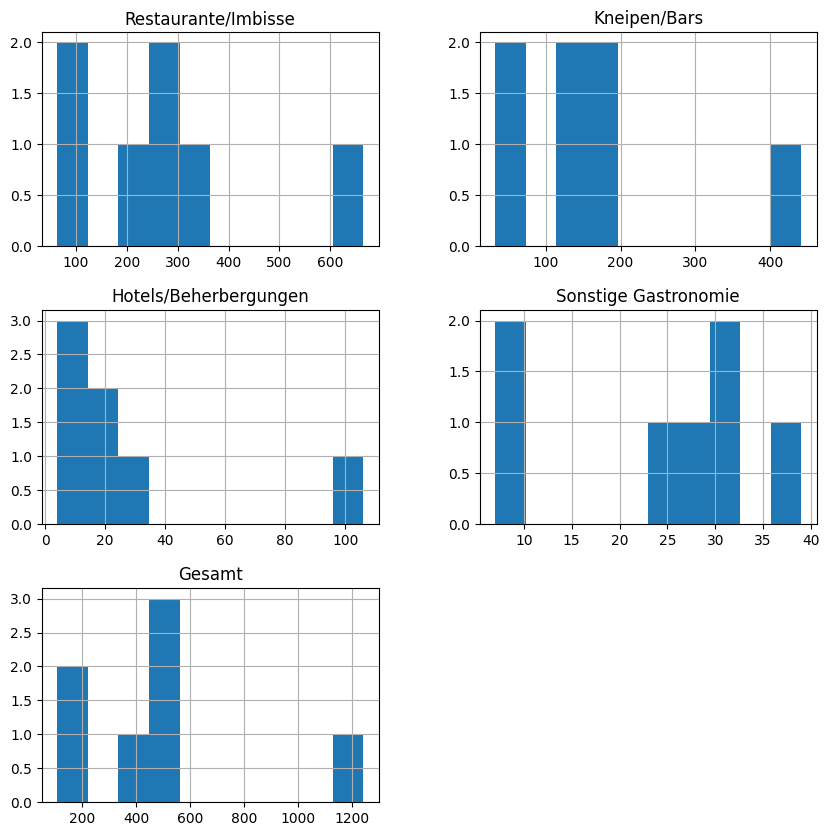

In [44]:
ax = data_gastro.hist(figsize=(10,10))
plt.show()

#### Erkenntnis zu Gastro-Daten:

##### Die Summe ist unterschiedlich zwischen Stadteilen, Differenz ist groß (von 100 bis 1200).

### Technisch: Korrelations-Analyse

#### Heat Maps

In [45]:
import numpy as np
import seaborn as sns

<AxesSubplot: xlabel='Rest', ylabel='Rest'>

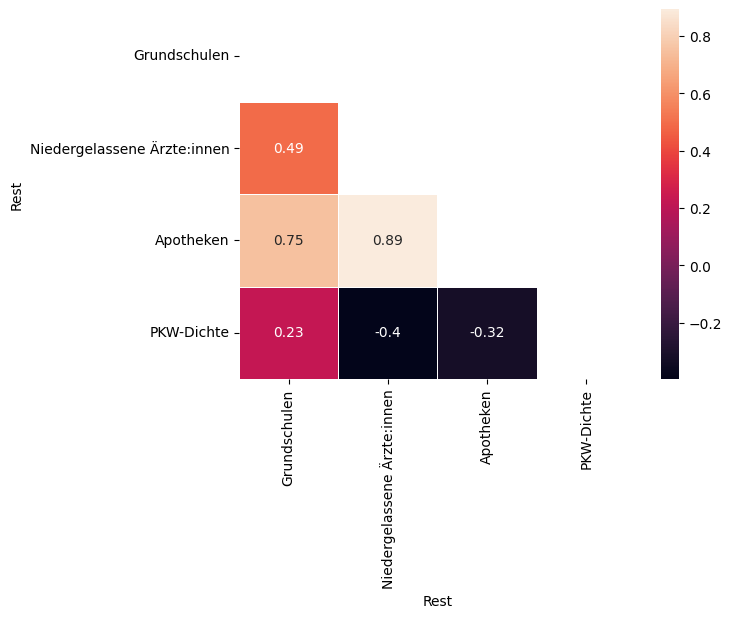

In [46]:
mask = np.triu(np.ones_like(data_rest.corr()))
sns.heatmap(data_rest.corr(), annot=True,linewidths=.5, mask=mask)

<AxesSubplot: xlabel='Wohnen', ylabel='Wohnen'>

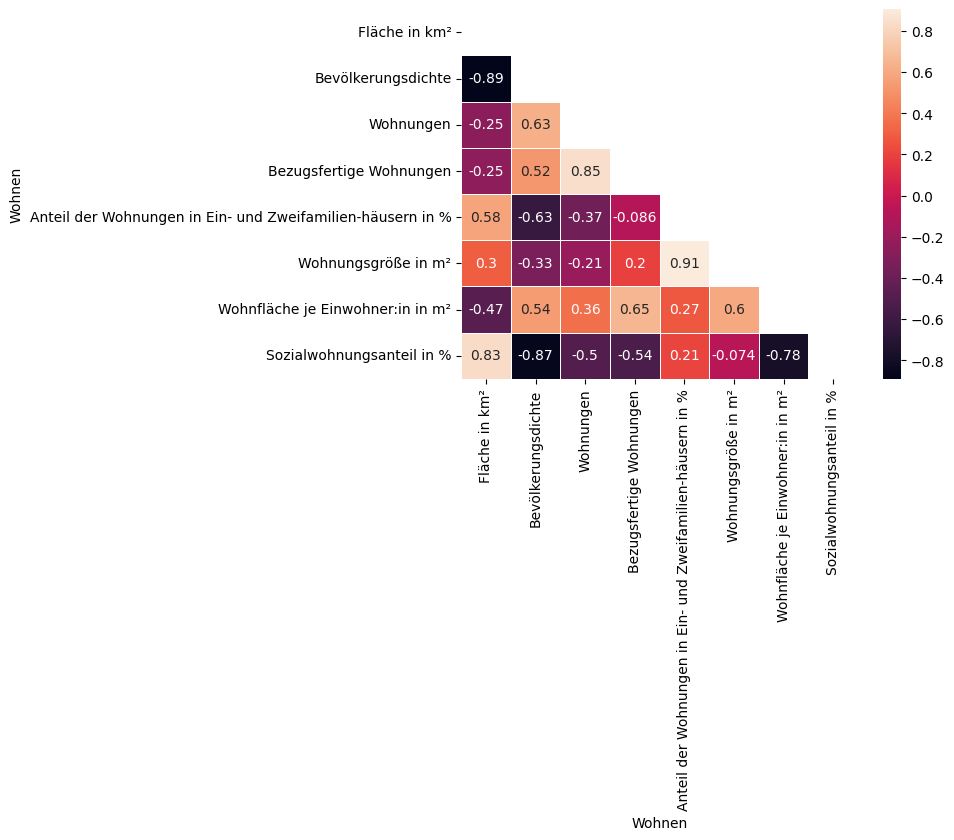

In [47]:
mask = np.triu(np.ones_like(data_wohnen.corr()))
sns.heatmap(data_wohnen.corr(), annot=True,linewidths=.5, mask=mask)

<AxesSubplot: xlabel='Wohlstand', ylabel='Wohlstand'>

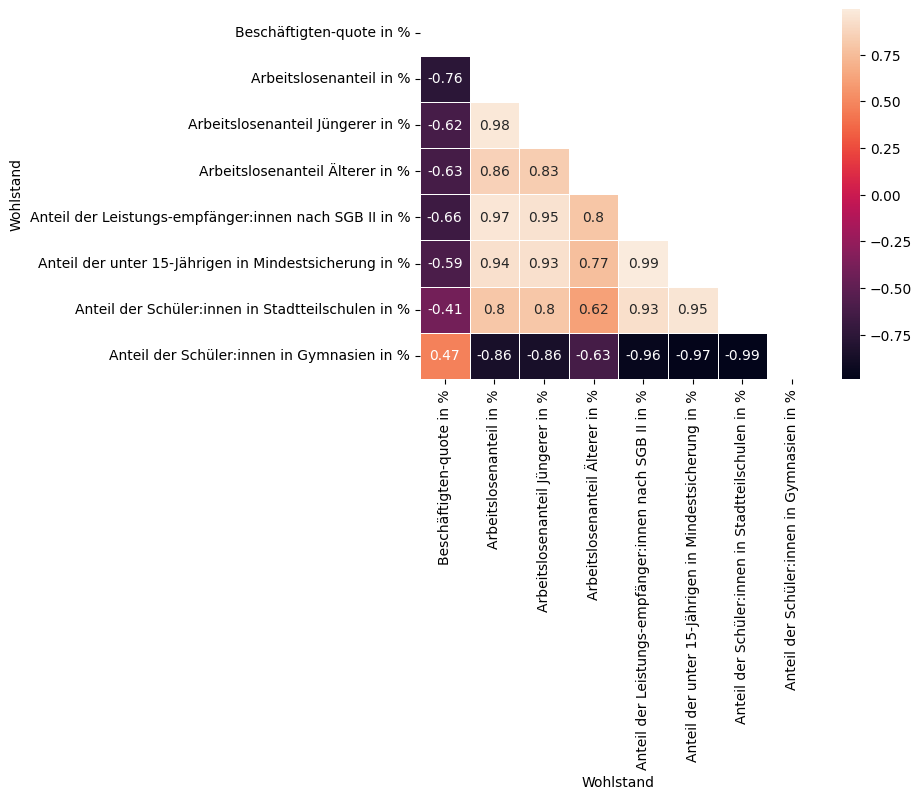

In [48]:
mask = np.triu(np.ones_like(data_wohlstand.corr()))
sns.heatmap(data_wohlstand.corr(), annot=True,linewidths=.5, mask=mask)

<AxesSubplot: xlabel='Bevölkerung', ylabel='Bevölkerung'>

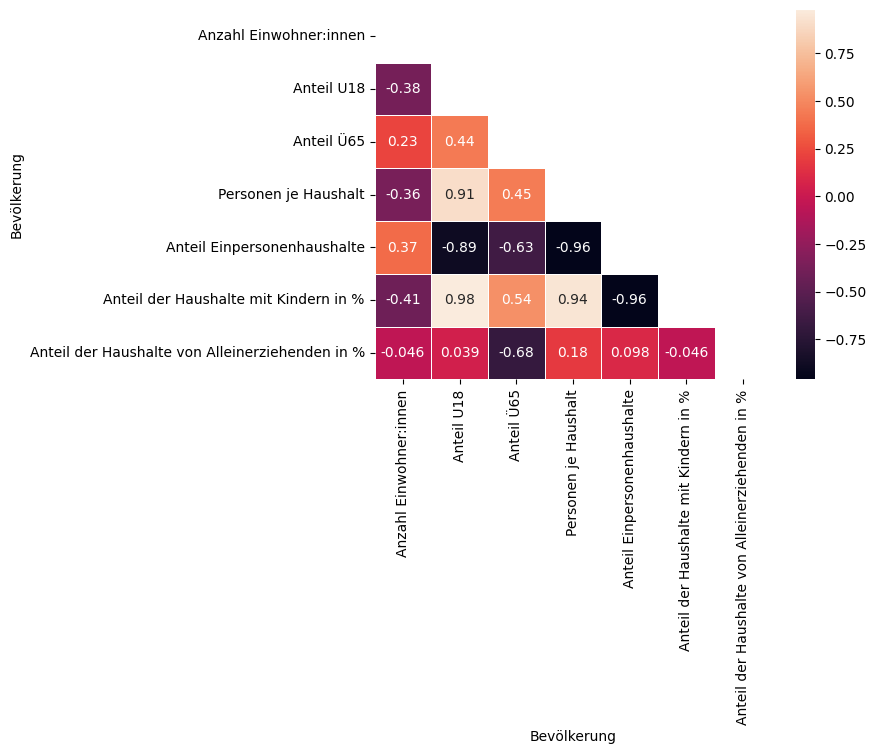

In [49]:
mask = np.triu(np.ones_like(data_bevoelkerung.corr()))
sns.heatmap(data_bevoelkerung.corr(), annot=True,linewidths=.5, mask=mask)

<AxesSubplot: xlabel='Bodenflächen', ylabel='Bodenflächen'>

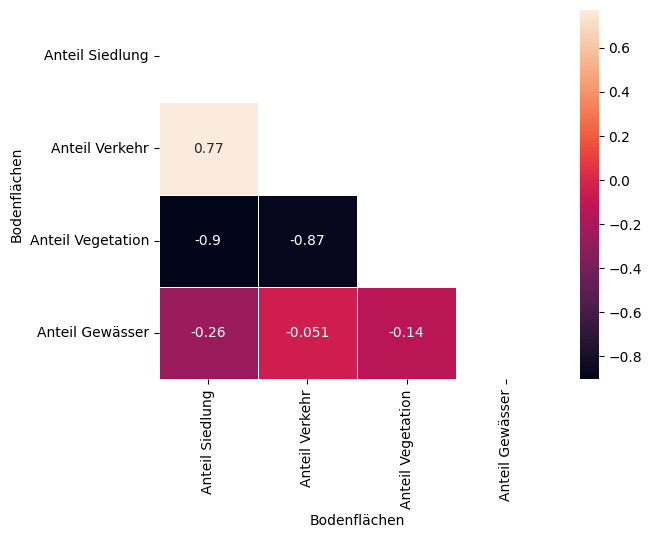

In [50]:
mask = np.triu(np.ones_like(data_bodenflaechen.corr()))
sns.heatmap(data_bodenflaechen.corr(), annot=True,linewidths=.5, mask=mask)

<AxesSubplot: xlabel='Siedlungsflächen', ylabel='Siedlungsflächen'>

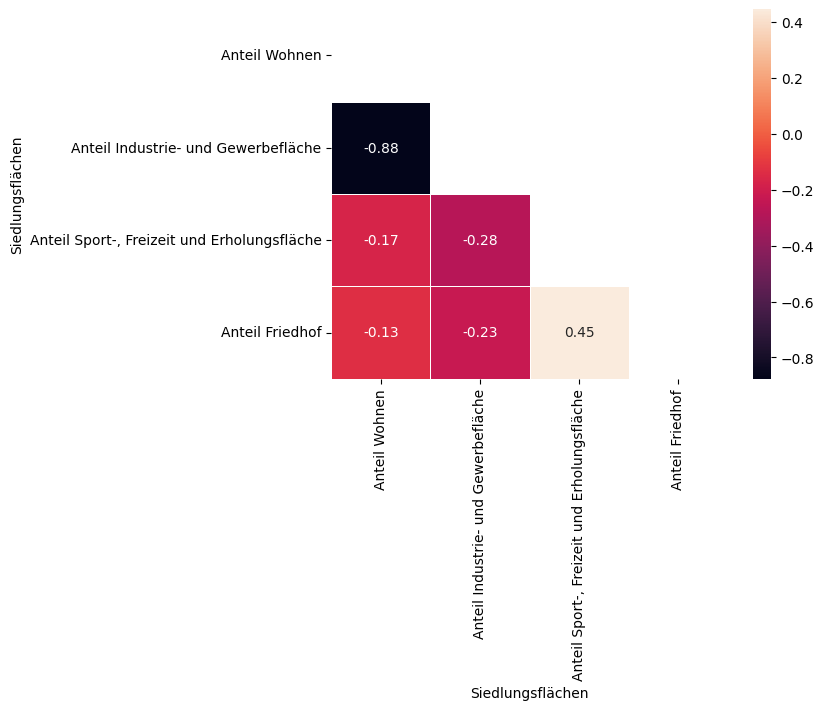

In [51]:
mask = np.triu(np.ones_like(data_siedlungsflaechen.corr()))
sns.heatmap(data_siedlungsflaechen.corr(), annot=True,linewidths=.5, mask=mask)

<AxesSubplot: xlabel='Nahversorgung', ylabel='Nahversorgung'>

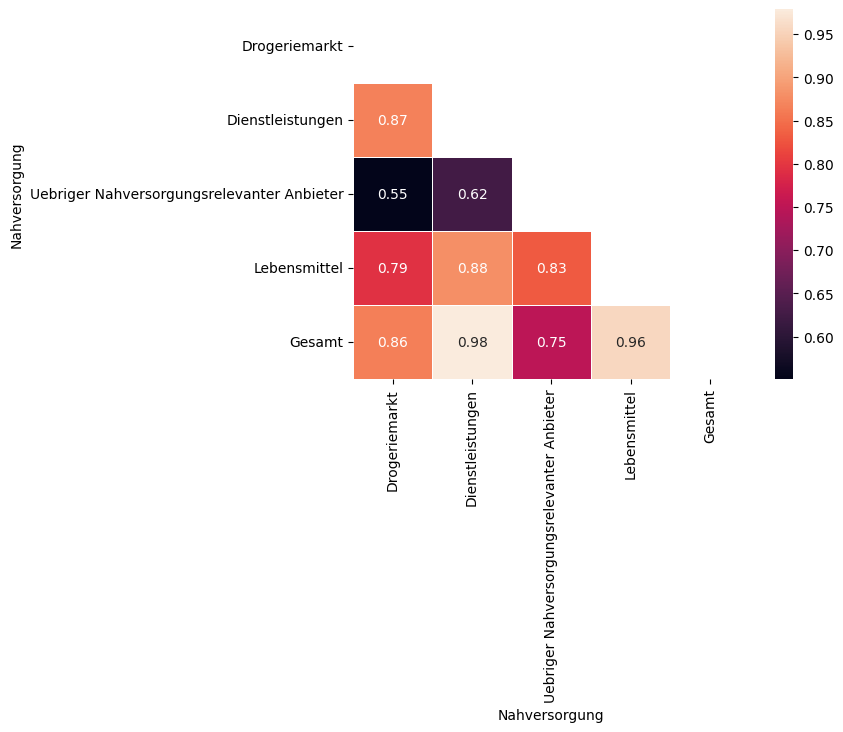

In [52]:
mask = np.triu(np.ones_like(data_nahversorgung.corr()))
sns.heatmap(data_nahversorgung.corr(), annot=True,linewidths=.5, mask=mask)

<AxesSubplot: xlabel='Freizeit', ylabel='Freizeit'>

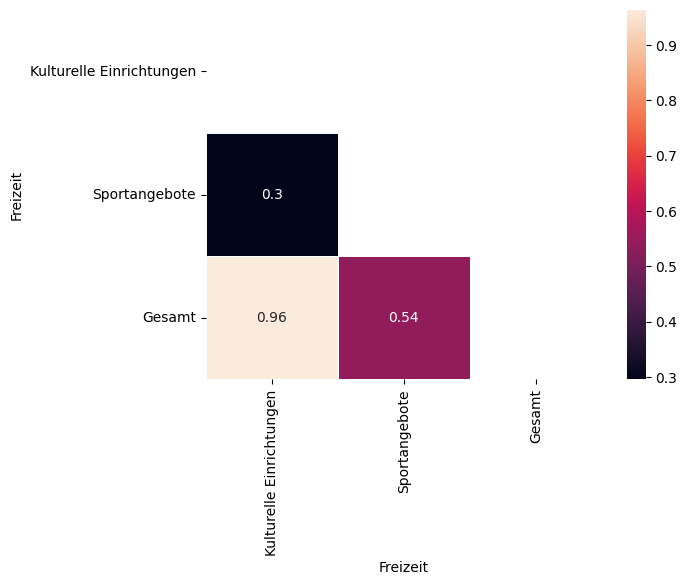

In [53]:
mask = np.triu(np.ones_like(data_freizeit.corr()))
sns.heatmap(data_freizeit.corr(), annot=True,linewidths=.5, mask=mask)

<AxesSubplot: xlabel='Gastronomie', ylabel='Gastronomie'>

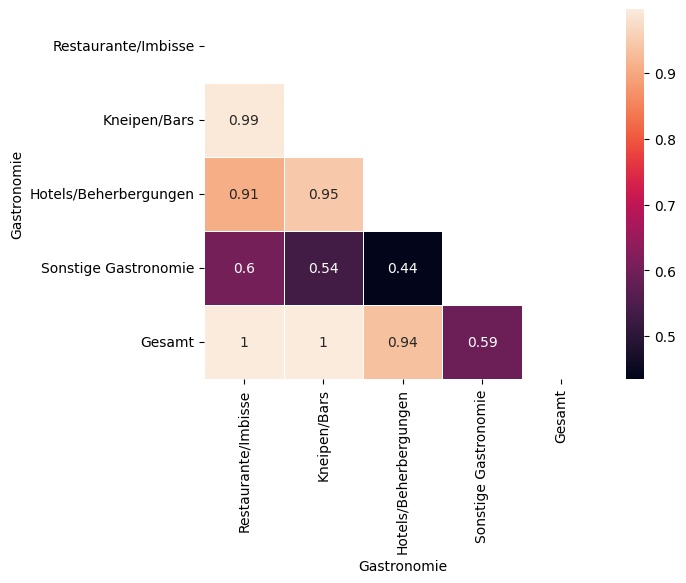

In [54]:
mask = np.triu(np.ones_like(data_gastro.corr()))
sns.heatmap(data_gastro.corr(), annot=True,linewidths=.5, mask=mask)

#### Erkenntnisse
Folgende Felder werden aufgrund von Korrelationen gedropped

In [55]:
# columns nach Korrelations-Analyse droppen
data_wohnen.drop(["Fläche in km²", # Korrelation mit Bevölkerungsdichte
                  "Wohnungen", # Korrelation mit Bezugsf. Wohnungen
                  "Anteil der Wohnungen in Ein- und Zweifamilien-häusern in %" # Korrelation mit Wohnungsgröße in m²
], axis=1, inplace=True)
data_wohnen

Wohnen,Bevölkerungsdichte,Bezugsfertige Wohnungen,Wohnungsgröße in m²,Wohnfläche je Einwohner:in in m²,Sozialwohnungsanteil in %
Bezirk,,,,,
Hamburg-Mitte,2117,1304,66.3,32.7,13.9
Altona,3538,2228,80.9,41.2,6.5
Eimsbüttel,5403,1500,76.3,41.2,4.0
Hamburg-Nord,5462,1907,68.8,39.8,4.8
Wandsbek,3001,2531,83.7,41.6,7.2
Bergedorf,847,1043,83.5,38.6,12.9
Harburg,1353,756,77.7,36.3,9.4


In [56]:
# columns nach Korrelations-Analyse droppen
data_wohlstand.drop(["Anteil der Schüler:innen in Stadtteilschulen in %", # Korrelation mit Schüler in Stadtteilschulen
                     "Arbeitslosenanteil Jüngerer in %", "Arbeitslosenanteil Älterer in %", "Beschäftigten-quote in %", 
                     "Anteil der Leistungs-empfänger:innen nach SGB II in %", "Anteil der unter 15-Jährigen in Mindestsicherung in %" # Korrelation mit Arbeitslosenanteil
], axis=1, inplace=True)

data_wohlstand

Wohlstand,Arbeitslosenanteil in %,Anteil der Schüler:innen in Gymnasien in %
Bezirk,,
Hamburg-Mitte,8.3,30.4
Altona,6.3,51.4
Eimsbüttel,5.2,57.1
Hamburg-Nord,5.3,52.5
Wandsbek,6.1,47.0
Bergedorf,5.8,38.8
Harburg,7.5,35.5


In [57]:
# columns nach Korrelations-Analyse droppen
data_bevoelkerung.drop(["Anteil Einpersonenhaushalte", "Anteil der Haushalte mit Kindern in %", 
                        "Anteil der Haushalte von Alleinerziehenden in %"], # Korrelation mit Personen je Haushalt
                        axis=1, inplace=True) 
data_bevoelkerung

Bevölkerung,Anzahl Einwohner:innen,Anteil U18,Anteil Ü65,Personen je Haushalt
Bezirk,,,,
Hamburg-Mitte,301231,16.2,14.3,1.8
Altona,275664,18.0,17.9,1.8
Eimsbüttel,269118,15.5,18.7,1.7
Hamburg-Nord,315514,13.9,16.1,1.6
Wandsbek,442702,17.5,21.5,1.9
Bergedorf,130994,18.3,18.8,2.0
Harburg,169221,18.4,17.8,1.9


### Fachlich: Bar Charts
Teilweise: https://towardsdatascience.com/how-to-create-and-visualize-complex-radar-charts-f7764d0f3652

#### Models

In [58]:
import plotly.express as px

warnings.simplefilter(action='ignore', category=FutureWarning)

In [59]:
# BEVÖLKERUNG

# Werte normalisieren
data = pd.DataFrame(index=data_bevoelkerung.index)

for column in data_bevoelkerung:
        normalized_row = []
        max = data_bevoelkerung[column].max()

        # xNorm = x / max(X)
        for value in data_bevoelkerung[column]:
                normalized_value = value/max
                normalized_row.append(normalized_value)

        data[column] = normalized_row

data = data.reindex(["Hamburg-Mitte", "Altona", "Eimsbüttel", "Hamburg-Nord", "Wandsbek", "Bergedorf", "Harburg"])

# Bar Plot
fig_bevölkerung = px.bar(data.transpose(), barmode='group', 
        labels={"value": "Wert (skaliert)",  "index": "Attribut"},
        color_discrete_sequence=["#212529", "#343a40", "#495057", "#6c757d", "#adb5bd", "#ced4da", "#dee2e6"]
)

In [60]:
# WOHLSTAND

# Werte normalisieren
data = pd.DataFrame(index=data_wohlstand.index)

for column in data_wohlstand:
        normalized_row = []
        max = data_wohlstand[column].max()

        # xNorm = x / max(X)
        for value in data_wohlstand[column]:
                normalized_value = value/max
                normalized_row.append(normalized_value)

        data[column] = normalized_row

data = data.reindex(["Hamburg-Mitte", "Altona", "Eimsbüttel", "Hamburg-Nord", "Wandsbek", "Bergedorf", "Harburg"])

# Bar Plot
fig_wohlstand = px.bar(data.transpose(), barmode='group', 
        labels={"value": "Wert (skaliert)",  "index": "Attribut"},
        color_discrete_sequence=["#212529", "#343a40", "#495057", "#6c757d", "#adb5bd", "#ced4da", "#dee2e6"]
)

In [61]:
# WOHNEN

# Werte normalisieren
data = pd.DataFrame(index=data_wohnen.index)

for column in data_wohnen:
        normalized_row = []
        max = data_wohnen[column].max()

        # xNorm = x / max(X)
        for value in data_wohnen[column]:
                normalized_value = value/max
                normalized_row.append(normalized_value)

        data[column] = normalized_row

data = data.reindex(["Hamburg-Mitte", "Altona", "Eimsbüttel", "Hamburg-Nord", "Wandsbek", "Bergedorf", "Harburg"])

# Bar Plot
fig_wohnen = px.bar(data.transpose(), barmode='group', 
        labels={"value": "Wert (skaliert)",  "index": "Attribut"},
        color_discrete_sequence=["#212529", "#343a40", "#495057", "#6c757d", "#adb5bd", "#ced4da", "#dee2e6"])

In [62]:
# NAHVERSORGUNG

# Werte normalisieren
data = pd.DataFrame(index=data_nahversorgung.iloc[:,:-1].index)

for column in data_nahversorgung.iloc[:,:-1]:
        normalized_row = []
        max = data_nahversorgung[column].max()

        # xNorm = x / max(X)
        for value in data_nahversorgung[column]:
                normalized_value = value/max
                normalized_row.append(normalized_value)

        data[column] = normalized_row

data = data.reindex(["Hamburg-Mitte", "Altona", "Eimsbüttel", "Hamburg-Nord", "Wandsbek", "Bergedorf", "Harburg"])

# Bar Plot
fig_versorgung = px.bar(data.transpose(), barmode='group', 
        labels={"value": "Wert (skaliert)",  "index": "Attribut"},
        color_discrete_sequence=["#212529", "#343a40", "#495057", "#6c757d", "#adb5bd", "#ced4da", "#dee2e6"])

In [63]:
# Gastro

# Werte normalisieren
data = pd.DataFrame(index=data_gastro.iloc[:,:-1].index)

for column in data_gastro.iloc[:,:-1]:
        normalized_row = []
        max = data_gastro[column].max()

        # xNorm = x / max(X)
        for value in data_gastro[column]:
                normalized_value = value/max
                normalized_row.append(normalized_value)

        data[column] = normalized_row

data = data.reindex(["Hamburg-Mitte", "Altona", "Eimsbüttel", "Hamburg-Nord", "Wandsbek", "Bergedorf", "Harburg"])

# Bar Plot
fig_gastro = px.bar(data.transpose(), barmode='group', 
        labels={"value": "Wert (skaliert)",  "index": "Attribut"},
        color_discrete_sequence=["#212529", "#343a40", "#495057", "#6c757d", "#adb5bd", "#ced4da", "#dee2e6"])

In [64]:
# Freizeit

# Werte normalisieren
data = pd.DataFrame(index=data_freizeit.iloc[:,:-1].index)

for column in data_freizeit.iloc[:,:-1]:
        normalized_row = []
        max = data_freizeit[column].max()

        # xNorm = x / max(X)
        for value in data_freizeit[column]:
                normalized_value = value/max
                normalized_row.append(normalized_value)

        data[column] = normalized_row

data = data.reindex(["Hamburg-Mitte", "Altona", "Eimsbüttel", "Hamburg-Nord", "Wandsbek", "Bergedorf", "Harburg"])

# Bar Plot
fig_freizeit = px.bar(data.transpose(), barmode='group', 
        labels={"value": "Wert (skaliert)",  "index": "Attribut"},
        color_discrete_sequence=["#212529", "#343a40", "#495057", "#6c757d", "#adb5bd", "#ced4da", "#dee2e6"])

In [65]:
# Bodenflächen

# Werte normalisieren
data = pd.DataFrame(index=data_bodenflaechen.index)

for column in data_bodenflaechen:
        normalized_row = []
        max = data_bodenflaechen[column].max()

        # xNorm = x / max(X)
        for value in data_bodenflaechen[column]:
                normalized_value = value/max
                normalized_row.append(normalized_value)

        data[column] = normalized_row

data = data.reindex(["Hamburg-Mitte", "Altona", "Eimsbüttel", "Hamburg-Nord", "Wandsbek", "Bergedorf", "Harburg"])

# Bar Plot
fig_bodenflächen = px.bar(data.transpose(), barmode='group', 
        labels={"value": "Wert (skaliert)",  "index": "Attribut"},
        color_discrete_sequence=["#212529", "#343a40", "#495057", "#6c757d", "#adb5bd", "#ced4da", "#dee2e6"])

In [66]:
# Siedlungsflächen

# Werte normalisieren
data = pd.DataFrame(index=data_siedlungsflaechen.index)

for column in data_siedlungsflaechen:
        normalized_row = []
        max = data_siedlungsflaechen[column].max()

        # xNorm = x / max(X)
        for value in data_siedlungsflaechen[column]:
                normalized_value = value/max
                normalized_row.append(normalized_value)

        data[column] = normalized_row

data = data.reindex(["Hamburg-Mitte", "Altona", "Eimsbüttel", "Hamburg-Nord", "Wandsbek", "Bergedorf", "Harburg"])

# Bar Plot
fig_siedlungsflächen = px.bar(data.transpose(), barmode='group', 
        labels={"value": "Wert (skaliert)",  "index": "Attribut"},
        color_discrete_sequence=["#212529", "#343a40", "#495057", "#6c757d", "#adb5bd", "#ced4da", "#dee2e6"])

In [67]:
# SONSTIGES

# Werte normalisieren
data = pd.DataFrame(index=data_rest.index)

for column in data_rest:
        normalized_row = []
        max = data_rest[column].max()

        # xNorm = x / max(X)
        for value in data_rest[column]:
                normalized_value = value/max
                normalized_row.append(normalized_value)

        data[column] = normalized_row

data = data.reindex(["Hamburg-Mitte", "Altona", "Eimsbüttel", "Hamburg-Nord", "Wandsbek", "Bergedorf", "Harburg"])

# Bar Plot
fig_sonstiges = px.bar(data.transpose(), barmode='group', 
        labels={"value": "Wert (skaliert)",  "index": "Attribut"},
        color_discrete_sequence=["#212529", "#343a40", "#495057", "#6c757d", "#adb5bd", "#ced4da", "#dee2e6"])

#### Dashboard

In [68]:
import dash_bootstrap_components as dbc
from dash_bootstrap_templates import load_figure_template
from jupyter_dash import JupyterDash
from dash import dcc, html, dash_table

In [69]:
# initialize app
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.LUX])
load_figure_template('LUX')

In [70]:
# change color for table rows
table_styling = [
                    {
                        'if': {
                            'filter_query': '{Bezirk} = "Hamburg-Mitte"'
                        },
                        'backgroundColor': '#212529',
                        'color': 'white'
                    },{
                        'if': {
                            'filter_query': '{Bezirk} = "Altona"'
                        },
                        'backgroundColor': '#343a40',
                        'color': 'white'
                    },{
                        'if': {
                            'filter_query': '{Bezirk} = "Eimsbüttel"'
                        },
                        'backgroundColor': '#495057',
                        'color': 'white'
                    },{
                        'if': {
                            'filter_query': '{Bezirk} = "Hamburg-Nord"'
                        },
                        'backgroundColor': '#6c757d',
                        'color': 'white'
                    },{
                        'if': {
                            'filter_query': '{Bezirk} = "Wandsbek"'
                        },
                        'backgroundColor': '#adb5bd',
                        'color': 'black'
                    },{
                        'if': {
                            'filter_query': '{Bezirk} = "Bergedorf"'
                        },
                        'backgroundColor': '#ced4da',
                        'color': 'black'
                    },{
                        'if': {
                            'filter_query': '{Bezirk} = "Harburg"'
                        },
                        'backgroundColor': '#dee2e6',
                        'color': 'black'
                    },
                ]

In [71]:
# change background color of charts
graph_styling = {
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)'
}

fig_bevölkerung.update_layout(graph_styling)
fig_wohlstand.update_layout(graph_styling)
fig_wohnen.update_layout(graph_styling)
fig_versorgung.update_layout(graph_styling)
fig_gastro.update_layout(graph_styling)
fig_freizeit.update_layout(graph_styling)
fig_bodenflächen.update_layout(graph_styling)
fig_siedlungsflächen.update_layout(graph_styling)
_ = fig_sonstiges.update_layout(graph_styling) # _ for no output

In [72]:
# put graphs together
app.layout = html.Div([
    html.H1("Explorative Analyse"),
    dcc.Tabs(style={'font-size':'70%'}, children=[
        dcc.Tab(label='Bevölkerung', children=[
            dcc.Graph(figure=fig_bevölkerung), 
            dash_table.DataTable(data=data_bevoelkerung.reset_index().to_dict(orient="records"), sort_action="native", 
                style_data_conditional=table_styling
            )
        ]),
        dcc.Tab(label='Wohlstand/Bildung', children=[
            dcc.Graph(figure=fig_wohlstand), 
            dash_table.DataTable(data=data_wohlstand.reset_index().to_dict(orient="records"), sort_action="native",
            style_data_conditional=table_styling)
        ]),
        dcc.Tab(label='Wohnen', children=[
            dcc.Graph(figure=fig_wohnen), 
            dash_table.DataTable(data=data_wohnen.reset_index().to_dict(orient="records"), sort_action="native",
            style_data_conditional=table_styling)
        ]),
        dcc.Tab(label='Nahversorgung', children=[
            dcc.Graph(figure=fig_versorgung), 
            dash_table.DataTable(data=data_nahversorgung.reset_index().to_dict(orient="records"), sort_action="native",
            style_data_conditional=table_styling)
        ]),
        dcc.Tab(label='Gastronomie', children=[
            dcc.Graph(figure=fig_gastro), 
            dash_table.DataTable(data=data_gastro.reset_index().to_dict(orient="records"), sort_action="native",
            style_data_conditional=table_styling)
        ]),
        dcc.Tab(label='Freizeit', children=[
            dcc.Graph(figure=fig_freizeit), 
            dash_table.DataTable(data=data_freizeit.reset_index().to_dict(orient="records"), sort_action="native",
            style_data_conditional=table_styling)
        ]),
        dcc.Tab(label='Bodenflächen', children=[
            dcc.Graph(figure=fig_bodenflächen), 
            dash_table.DataTable(data=data_bodenflaechen.reset_index().to_dict(orient="records"), sort_action="native",
            style_data_conditional=table_styling)
        ]),
        dcc.Tab(label='Siedlungsflächen', children=[
            dcc.Graph(figure=fig_siedlungsflächen), 
            dash_table.DataTable(data=data_siedlungsflaechen.reset_index().to_dict(orient="records"), sort_action="native",
            style_data_conditional=table_styling
            )
        ]),
        dcc.Tab(label='Sonstiges', children=[
            dcc.Graph(figure=fig_sonstiges), 
            dash_table.DataTable(data=data_rest.reset_index().to_dict(orient="records"), sort_action="native",
            style_data_conditional=table_styling)
        ])
    ])
])

In [73]:
# # # open in browser
# app.run_server(debug=True)

In [74]:
# open in notebook
app.run_server(mode="inline", debug=True)

### Review

**Hürden bei der explorat. Analyse**
- sehr viele Attribute und Dimensionen -> schwer kompakt darzustellen bzw. einen Überblick zu bekommen 

## Analyse: MultiCriteria Decision Analysis (MCDA)

MCDA:
- Disziplin des Operations Research 
- Evaluieren von vielen Kriterien zur Ableitung von Entscheidungen und Handlungsempfehlungen
- Mithilfe von Gewichtung der Variablen

https://en.wikipedia.org/wiki/Multiple-criteria_decision_analysis, https://www.youtube.com/watch?v=76IMbiUbyDM

In [75]:
# create one big dataframe
decision_matrix = pd.merge(
    pd.merge(
        pd.merge(
            pd.merge(
                pd.merge(
                    pd.merge(
                        pd.merge(
                            pd.merge(
                            data_bevoelkerung, data_bodenflaechen,on="Bezirk"), 
                            data_freizeit.iloc[:,:-1], on="Bezirk"), 
                            data_gastro.iloc[:,:-1], on="Bezirk"), 
                            data_nahversorgung.iloc[:,:-1], on="Bezirk"), 
                            data_rest, on="Bezirk"), 
                            data_siedlungsflaechen, on="Bezirk"),
                            data_wohlstand, on="Bezirk"),
                            data_wohnen, on="Bezirk")
decision_matrix = decision_matrix.round(2)
decision_matrix

,Anzahl Einwohner:innen,Anteil U18,Anteil Ü65,Personen je Haushalt,Anteil Siedlung,Anteil Verkehr,Anteil Vegetation,Anteil Gewässer,Kulturelle Einrichtungen,Sportangebote,Restaurante/Imbisse,Kneipen/Bars,Hotels/Beherbergungen,Sonstige Gastronomie,Drogeriemarkt,Dienstleistungen,Uebriger Nahversorgungsrelevanter Anbieter,Lebensmittel,Grundschulen,Niedergelassene Ärzte:innen,Apotheken,PKW-Dichte,Anteil Wohnen,Anteil Industrie- und Gewerbefläche,"Anteil Sport-, Freizeit und Erholungsfläche",Anteil Friedhof,Arbeitslosenanteil in %,Anteil der Schüler:innen in Gymnasien in %,Bevölkerungsdichte,Bezugsfertige Wohnungen,Wohnungsgröße in m²,Wohnfläche je Einwohner:in in m²,Sozialwohnungsanteil in %
Bezirk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Hamburg-Mitte,301231,16.2,14.3,1.8,46.28,15.56,14.24,23.93,128,26,665,442,106,31,30,1048,179,736,30,779,69,265,22.55,49.24,17.51,2.03,8.3,30.4,2117,1304,66.3,32.7,13.9
Altona,275664,18.0,17.9,1.8,61.96,12.17,17.58,8.29,28,18,230,134,15,30,29,631,79,463,31,879,59,334,54.49,9.73,21.73,2.74,6.3,51.4,3538,2228,80.9,41.2,6.5
Eimsbüttel,269118,15.5,18.7,1.7,67.34,18.38,12.28,2.00,24,20,302,155,17,28,20,906,71,471,29,927,57,340,58.75,10.50,17.32,0.81,5.2,57.1,5403,1500,76.3,41.2,4.0
Hamburg-Nord,315514,13.9,16.1,1.6,67.72,26.02,3.06,3.20,16,20,327,176,11,23,32,1120,108,519,25,1068,73,319,45.92,8.55,21.82,10.06,5.3,52.5,5462,1907,68.8,39.8,4.8
Wandsbek,442702,17.5,21.5,1.9,57.54,11.13,29.95,1.38,39,48,256,132,27,39,42,1235,107,590,53,834,80,398,66.76,7.83,15.70,0.66,6.1,47.0,3001,2531,83.7,41.6,7.2
Bergedorf,130994,18.3,18.8,2.0,25.36,6.06,61.45,7.12,20,10,63,32,4,7,13,285,66,148,18,221,22,398,40.86,19.76,22.70,0.66,5.8,38.8,847,1043,83.5,38.6,12.9
Harburg,169221,18.4,17.8,1.9,32.56,8.88,53.98,4.58,20,12,105,57,10,7,12,425,69,268,20,293,29,342,44.52,28.64,15.60,1.72,7.5,35.5,1353,756,77.7,36.3,9.4


In [76]:
# assign weights and benefical status (True = je mehr desto besser, False = je weniger desto besser) to each attribute
weights = {
                    "Anzahl Einwohner:innen": {
                        "benefical": True,
                        "weight": 0
                    },
                    "Anteil U18": {
                        "benefical": False,
                        "weight": 0
                    },
                    "Anteil Ü65": {
                        "benefical": False,
                        "weight": 0
                    },
                    "Personen je Haushalt": {
                        "benefical": False,
                        "weight": 0.025
                    },
                    "Anteil Siedlung": {
                        "benefical": False,
                        "weight": 0
                    },
                    "Anteil Verkehr": {
                        "benefical": False,
                        "weight": 0.025
                    },
                    "Anteil Vegetation": {
                        "benefical": True,
                        "weight": 0.1
                    },
                    "Anteil Gewässer": {
                        "benefical": True,
                        "weight": 0.025
                    },
                    "Kulturelle Einrichtungen": {
                        "benefical": True,
                        "weight": 0.05
                    }, 
                    "Sportangebote": {
                        "benefical": True,
                        "weight": 0.08
                    },
                    "Restaurante/Imbisse": {
                        "benefical": True,
                        "weight": 0.08
                    },
                    "Kneipen/Bars": {
                        "benefical": True,
                        "weight": 0.025
                    },
                    "Hotels/Beherbergungen": {
                        "benefical": False,
                        "weight": 0
                    },
                    "Sonstige Gastronomie": {
                        "benefical":True,
                        "weight": 0
                    },
                    "Drogeriemarkt": {
                        "benefical": True,
                        "weight": 0.04
                    },
                    "Dienstleistungen": {
                        "benefical": True,
                        "weight": 0.025
                    },
                    "Uebriger Nahversorgungsrelevanter Anbieter": {
                        "benefical": True,
                        "weight": 0
                    },
                    "Lebensmittel": {
                        "benefical": True,
                        "weight": 0.08
                    },
                    "Grundschulen": {
                        "benefical": False,
                        "weight": 0
                    },
                    "Niedergelassene Ärzte:innen": {
                        "benefical": True,
                        "weight": 0.025
                    },
                    "Apotheken": {
                        "benefical": True,
                        "weight": 0.025
                    },
                    "PKW-Dichte": {
                        "benefical": False,
                        "weight": 0.04
                    },
                    "Anteil Wohnen": {
                        "benefical": True,
                        "weight": 0.025
                    },
                    "Anteil Industrie- und Gewerbefläche": {
                        "benefical": False,
                        "weight": 0.04
                    },
                    "Anteil Sport-, Freizeit und Erholungsfläche": {
                        "benefical": True,
                        "weight": 0.1
                    }, 
                    "Anteil Friedhof": {
                        "benefical": False,
                        "weight": 0
                    },
                    "Arbeitslosenanteil in %": {
                        "benefical": False,
                        "weight": 0.04
                    },
                    "Anteil der Schüler:innen in Gymnasien in %": {
                        "benefical": True,
                        "weight": 0
                    },
                    "Bevölkerungsdichte": {
                        "benefical": False,
                        "weight": 0.025
                    },
                    "Bezugsfertige Wohnungen": {
                        "benefical": True,
                        "weight": 0.025
                    },
                    "Wohnungsgröße in m²": {
                        "benefical": True,
                        "weight": 0.025
                    },
                    "Wohnfläche je Einwohner:in in m²": {
                        "benefical": True,
                        "weight": 0.05
                    },
                    "Sozialwohnungsanteil in %": {
                        "benefical": True,
                        "weight": 0.025
                    }

}

In [77]:
# check if sum of weights is 100%
sum = 0
for item in weights:
    sum += weights[item]["weight"]
round(sum*100)

100

In [78]:
# check how many benefical/non-benefical attributes
sum_benefical = 0
sum_non_benefical = 0

for item in weights:
    if weights[item]["benefical"] == True:
        sum_benefical += 1
    else:
        sum_non_benefical += 1

print("benefical: " + str(sum_benefical) + ", non-benefical: " + str(sum_non_benefical))

benefical: 21, non-benefical: 12


In [79]:
# normalize values

normalized_df = pd.DataFrame(index=decision_matrix.index)

for column in decision_matrix:

    normalized_row = []

    # bigger value = better
    if weights[column]["benefical"] == True:
        max = decision_matrix[column].max()

        # xNorm = x / max(X)
        for value in decision_matrix[column]:
            normalized_value = value/max
            normalized_row.append(normalized_value)
    
    # smaller value = better
    elif weights[column]["benefical"] == False:

        # xNorm = min(X) / x
        min = decision_matrix[column].min()
        for value in decision_matrix[column]:
            normalized_value = min / value
            normalized_row.append(normalized_value)

    normalized_df[column] = normalized_row

normalized_df

,Anzahl Einwohner:innen,Anteil U18,Anteil Ü65,Personen je Haushalt,Anteil Siedlung,Anteil Verkehr,Anteil Vegetation,Anteil Gewässer,Kulturelle Einrichtungen,Sportangebote,Restaurante/Imbisse,Kneipen/Bars,Hotels/Beherbergungen,Sonstige Gastronomie,Drogeriemarkt,Dienstleistungen,Uebriger Nahversorgungsrelevanter Anbieter,Lebensmittel,Grundschulen,Niedergelassene Ärzte:innen,Apotheken,PKW-Dichte,Anteil Wohnen,Anteil Industrie- und Gewerbefläche,"Anteil Sport-, Freizeit und Erholungsfläche",Anteil Friedhof,Arbeitslosenanteil in %,Anteil der Schüler:innen in Gymnasien in %,Bevölkerungsdichte,Bezugsfertige Wohnungen,Wohnungsgröße in m²,Wohnfläche je Einwohner:in in m²,Sozialwohnungsanteil in %
Bezirk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Hamburg-Mitte,0.680437,0.858025,1.000000,0.888889,0.547969,0.389460,0.231733,1.000000,1.000000,0.541667,1.000000,1.000000,0.037736,0.794872,0.714286,0.848583,1.000000,1.000000,0.600000,0.729401,0.8625,1.000000,0.337777,0.159017,0.771366,0.325123,0.626506,0.532399,0.400094,0.515211,0.792115,0.786058,1.000000
Altona,0.622685,0.772222,0.798883,0.888889,0.409296,0.497946,0.286086,0.346427,0.218750,0.375000,0.345865,0.303167,0.266667,0.769231,0.690476,0.510931,0.441341,0.629076,0.580645,0.823034,0.7375,0.793413,0.816207,0.804728,0.957269,0.240876,0.825397,0.900175,0.239401,0.880284,0.966547,0.990385,0.467626
Eimsbüttel,0.607899,0.896774,0.764706,0.941176,0.376596,0.329706,0.199837,0.083577,0.187500,0.416667,0.454135,0.350679,0.235294,0.717949,0.476190,0.733603,0.396648,0.639946,0.620690,0.867978,0.7125,0.779412,0.880018,0.745714,0.762996,0.814815,1.000000,1.000000,0.156765,0.592651,0.911589,0.990385,0.287770
Hamburg-Nord,0.712701,1.000000,0.888199,1.000000,0.374483,0.232898,0.049797,0.133723,0.125000,0.416667,0.491729,0.398190,0.363636,0.589744,0.761905,0.906883,0.603352,0.705163,0.720000,1.000000,0.9125,0.830721,0.687837,0.915789,0.961233,0.065606,0.981132,0.919440,0.155071,0.753457,0.821983,0.956731,0.345324
Wandsbek,1.000000,0.794286,0.665116,0.842105,0.440737,0.544474,0.487388,0.057668,0.304688,1.000000,0.384962,0.298643,0.148148,1.000000,1.000000,1.000000,0.597765,0.801630,0.339623,0.780899,1.0000,0.665829,1.000000,1.000000,0.691630,1.000000,0.852459,0.823117,0.282239,1.000000,1.000000,1.000000,0.517986
Bergedorf,0.295897,0.759563,0.760638,0.800000,1.000000,1.000000,1.000000,0.297534,0.156250,0.208333,0.094737,0.072398,1.000000,0.179487,0.309524,0.230769,0.368715,0.201087,1.000000,0.206929,0.2750,0.665829,0.612043,0.396255,1.000000,1.000000,0.896552,0.679510,1.000000,0.412090,0.997611,0.927885,0.928058
Harburg,0.382246,0.755435,0.803371,0.842105,0.778870,0.682432,0.878438,0.191392,0.156250,0.250000,0.157895,0.128959,0.400000,0.179487,0.285714,0.344130,0.385475,0.364130,0.900000,0.274345,0.3625,0.774854,0.666866,0.273394,0.687225,0.383721,0.693333,0.621716,0.626016,0.298696,0.928315,0.872596,0.676259


In [80]:
# apply weight to each value

weighted_df = pd.DataFrame(index = normalized_df.index)

for column in normalized_df:

    weight = weights[column]["weight"]
    weighted_row = []

    for value in normalized_df[column]:
        weighted_value = value * weight
        weighted_row.append(weighted_value)

    weighted_df[column] = weighted_row
    
weighted_df = weighted_df
weighted_df["Performance Score"] = weighted_df.sum(axis=1)
weighted_df["Rank"] = weighted_df["Performance Score"].rank(ascending=False, method='dense')

weighted_df.sort_values("Rank", ascending=True, inplace=True)
weighted_df

,Anzahl Einwohner:innen,Anteil U18,Anteil Ü65,Personen je Haushalt,Anteil Siedlung,Anteil Verkehr,Anteil Vegetation,Anteil Gewässer,Kulturelle Einrichtungen,Sportangebote,Restaurante/Imbisse,Kneipen/Bars,Hotels/Beherbergungen,Sonstige Gastronomie,Drogeriemarkt,Dienstleistungen,Uebriger Nahversorgungsrelevanter Anbieter,Lebensmittel,Grundschulen,Niedergelassene Ärzte:innen,Apotheken,PKW-Dichte,Anteil Wohnen,Anteil Industrie- und Gewerbefläche,"Anteil Sport-, Freizeit und Erholungsfläche",Anteil Friedhof,Arbeitslosenanteil in %,Anteil der Schüler:innen in Gymnasien in %,Bevölkerungsdichte,Bezugsfertige Wohnungen,Wohnungsgröße in m²,Wohnfläche je Einwohner:in in m²,Sozialwohnungsanteil in %,Performance Score,Rank
Bezirk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Hamburg-Mitte,0.0,0.0,0.0,0.022222,0.0,0.009737,0.023173,0.025000,0.050000,0.043333,0.080000,0.025000,0.0,0.0,0.028571,0.021215,0.0,0.080000,0.0,0.018235,0.021563,0.040000,0.008444,0.006361,0.077137,0.0,0.025060,0.0,0.010002,0.012880,0.019803,0.039303,0.025000,0.712039,1.0
Wandsbek,0.0,0.0,0.0,0.021053,0.0,0.013612,0.048739,0.001442,0.015234,0.080000,0.030797,0.007466,0.0,0.0,0.040000,0.025000,0.0,0.064130,0.0,0.019522,0.025000,0.026633,0.025000,0.040000,0.069163,0.0,0.034098,0.0,0.007056,0.025000,0.025000,0.050000,0.012950,0.706895,2.0
Hamburg-Nord,0.0,0.0,0.0,0.025000,0.0,0.005822,0.004980,0.003343,0.006250,0.033333,0.039338,0.009955,0.0,0.0,0.030476,0.022672,0.0,0.056413,0.0,0.025000,0.022812,0.033229,0.017196,0.036632,0.096123,0.0,0.039245,0.0,0.003877,0.018836,0.020550,0.047837,0.008633,0.607553,3.0
Altona,0.0,0.0,0.0,0.022222,0.0,0.012449,0.028609,0.008661,0.010938,0.030000,0.027669,0.007579,0.0,0.0,0.027619,0.012773,0.0,0.050326,0.0,0.020576,0.018438,0.031737,0.020405,0.032189,0.095727,0.0,0.033016,0.0,0.005985,0.022007,0.024164,0.049519,0.011691,0.604297,4.0
Eimsbüttel,0.0,0.0,0.0,0.023529,0.0,0.008243,0.019984,0.002089,0.009375,0.033333,0.036331,0.008767,0.0,0.0,0.019048,0.018340,0.0,0.051196,0.0,0.021699,0.017813,0.031176,0.022000,0.029829,0.076300,0.0,0.040000,0.0,0.003919,0.014816,0.022790,0.049519,0.007194,0.567290,5.0
Bergedorf,0.0,0.0,0.0,0.020000,0.0,0.025000,0.100000,0.007438,0.007812,0.016667,0.007579,0.001810,0.0,0.0,0.012381,0.005769,0.0,0.016087,0.0,0.005173,0.006875,0.026633,0.015301,0.015850,0.100000,0.0,0.035862,0.0,0.025000,0.010302,0.024940,0.046394,0.023201,0.556076,6.0
Harburg,0.0,0.0,0.0,0.021053,0.0,0.017061,0.087844,0.004785,0.007812,0.020000,0.012632,0.003224,0.0,0.0,0.011429,0.008603,0.0,0.029130,0.0,0.006859,0.009062,0.030994,0.016672,0.010936,0.068722,0.0,0.027733,0.0,0.015650,0.007467,0.023208,0.043630,0.016906,0.501413,7.0


## Fazit: Der beste Bezirk

In [81]:
from matplotlib import pyplot as plt

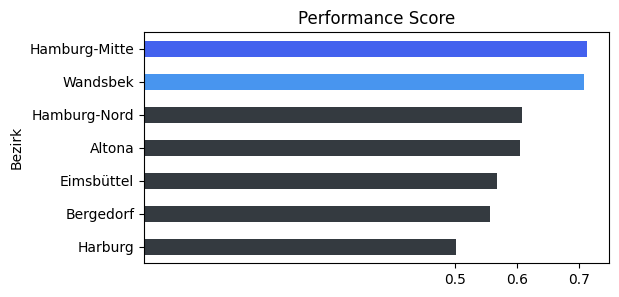

In [82]:
_ = weighted_df["Performance Score"].sort_values(ascending=True).plot(kind="barh", color=["#343a40", "#343a40", "#343a40", "#343a40", "#343a40", "#4895ef", "#4361ee"], 
                                                                        title="Performance Score", figsize=[6,3],
                                                                        xticks=[0.5, 0.6, 0.7])

In [104]:
# get bezirk mit bestem Rang (= min() von Rang)
bester_bezirk = weighted_df.loc[weighted_df["Rank"] == weighted_df["Rank"].min()].index[0]
bester_bezirk_df = decision_matrix.loc[decision_matrix.index == bester_bezirk]

bester_bezirk_df

,Anzahl Einwohner:innen,Anteil U18,Anteil Ü65,Personen je Haushalt,Anteil Siedlung,Anteil Verkehr,Anteil Vegetation,Anteil Gewässer,Kulturelle Einrichtungen,Sportangebote,Restaurante/Imbisse,Kneipen/Bars,Hotels/Beherbergungen,Sonstige Gastronomie,Drogeriemarkt,Dienstleistungen,Uebriger Nahversorgungsrelevanter Anbieter,Lebensmittel,Grundschulen,Niedergelassene Ärzte:innen,Apotheken,PKW-Dichte,Anteil Wohnen,Anteil Industrie- und Gewerbefläche,"Anteil Sport-, Freizeit und Erholungsfläche",Anteil Friedhof,Arbeitslosenanteil in %,Anteil der Schüler:innen in Gymnasien in %,Bevölkerungsdichte,Bezugsfertige Wohnungen,Wohnungsgröße in m²,Wohnfläche je Einwohner:in in m²,Sozialwohnungsanteil in %
Bezirk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Hamburg-Mitte,301231,16.2,14.3,1.8,46.28,15.56,14.24,23.93,128,26,665,442,106,31,30,1048,179,736,30,779,69,265,22.55,49.24,17.51,2.03,8.3,30.4,2117,1304,66.3,32.7,13.9


In [105]:
# get all NON-ZERO weighted performance values
zero_columns = (weighted_df != 0).any()
bester_bezirk_weighted = weighted_df.loc[:, zero_columns]
bester_bezirk_weighted.drop(["Performance Score", "Rank"], axis=1, inplace=True)

# get all columns where the beste bezirk scored the best
best_columns = bester_bezirk_weighted.idxmax(axis=0) == bester_bezirk
bester_bezirk_weighted = bester_bezirk_weighted.loc[:, best_columns]

# show
bester_bezirk_weighted = bester_bezirk_weighted.round(4)
bester_bezirk_weighted.style.apply(lambda x: ['background: #4895ef' 
                                  if (x.name == bester_bezirk)
                                  else '' for i in x], axis=1)

,Anteil Gewässer,Kulturelle Einrichtungen,Restaurante/Imbisse,Kneipen/Bars,Lebensmittel,PKW-Dichte,Sozialwohnungsanteil in %
Bezirk,,,,,,,
Hamburg-Mitte,0.025000,0.050000,0.080000,0.025000,0.080000,0.040000,0.025000
Wandsbek,0.001400,0.015200,0.030800,0.007500,0.064100,0.026600,0.012900
Hamburg-Nord,0.003300,0.006200,0.039300,0.010000,0.056400,0.033200,0.008600
Altona,0.008700,0.010900,0.027700,0.007600,0.050300,0.031700,0.011700
Eimsbüttel,0.002100,0.009400,0.036300,0.008800,0.051200,0.031200,0.007200
Bergedorf,0.007400,0.007800,0.007600,0.001800,0.016100,0.026600,0.023200
Harburg,0.004800,0.007800,0.012600,0.003200,0.029100,0.031000,0.016900


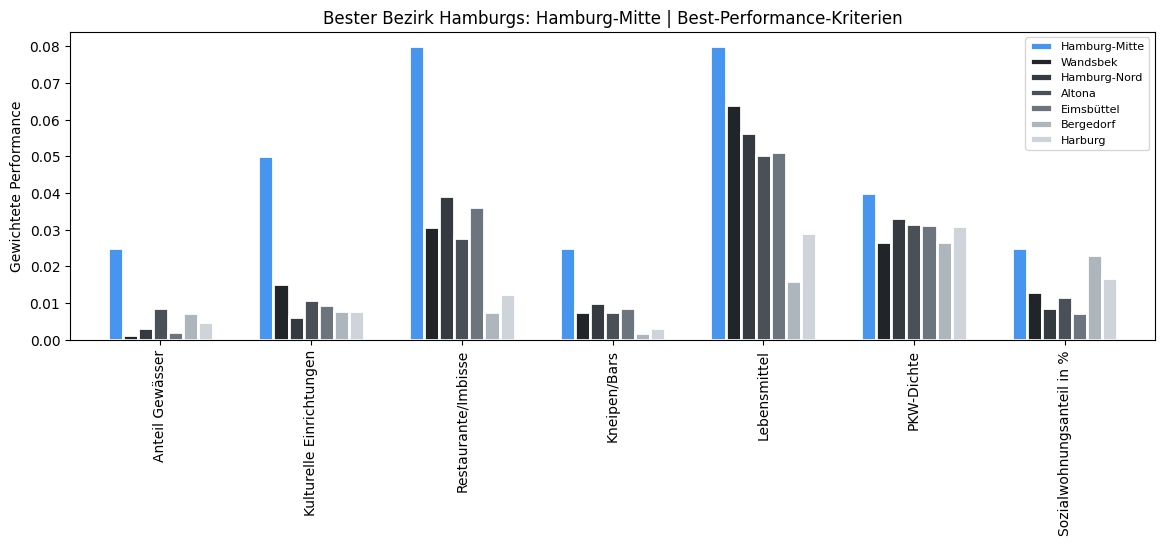

In [117]:
# why this bezirk got best?
bester_bezirk_weighted.transpose().plot.bar(color=["#4895ef", "#212529", "#343a40", "#495057", "#6c757d", "#adb5bd", "#ced4da"], figsize=(14, 4),  width=0.7, edgecolor='white', 
                                                    linewidth=2, ylabel="Gewichtete Performance", title="Bester Bezirk Hamburgs: Hamburg-Mitte | Best-Performance-Kriterien") 
plt.legend(loc="upper right",  prop={'size': 8})
plt.show()

In [109]:
# get all NON-ZERO weighted performance values
zero_columns = (weighted_df != 0).any()
bester_bezirk_weighted_worst = weighted_df.loc[:, zero_columns]
bester_bezirk_weighted_worst.drop(["Performance Score", "Rank"], axis=1, inplace=True)

# get all columns where the beste bezirk scored the best
worst_columns = bester_bezirk_weighted_worst.idxmin(axis=0) == bester_bezirk
bester_bezirk_weighted_worst = bester_bezirk_weighted_worst.loc[:, worst_columns]

# show
bester_bezirk_weighted_worst = bester_bezirk_weighted_worst.round(4)
bester_bezirk_weighted_worst.style.apply(lambda x: ['background: #4895ef' 
                                  if (x.name == bester_bezirk)
                                  else '' for i in x], axis=1)

,Anteil Wohnen,Anteil Industrie- und Gewerbefläche,Arbeitslosenanteil in %,Wohnungsgröße in m²,Wohnfläche je Einwohner:in in m²
Bezirk,,,,,
Hamburg-Mitte,0.008400,0.006400,0.025100,0.019800,0.039300
Wandsbek,0.025000,0.040000,0.034100,0.025000,0.050000
Hamburg-Nord,0.017200,0.036600,0.039200,0.020500,0.047800
Altona,0.020400,0.032200,0.033000,0.024200,0.049500
Eimsbüttel,0.022000,0.029800,0.040000,0.022800,0.049500
Bergedorf,0.015300,0.015900,0.035900,0.024900,0.046400
Harburg,0.016700,0.010900,0.027700,0.023200,0.043600


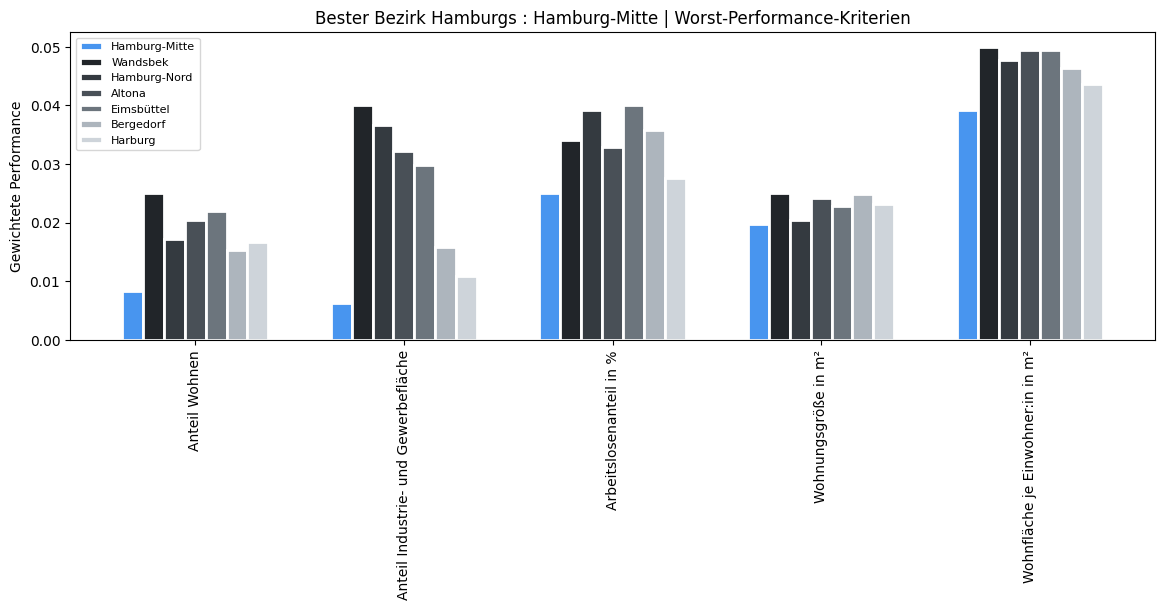

In [116]:
# which are the criteria with bad performance?
bester_bezirk_weighted_worst.transpose().plot.bar(color=["#4895ef", "#212529", "#343a40", "#495057", "#6c757d", "#adb5bd", "#ced4da"], figsize=(14, 4),  width=0.7, edgecolor='white', 
                                                    linewidth=2, ylabel="Gewichtete Performance", title="Bester Bezirk Hamburgs : Hamburg-Mitte | Worst-Performance-Kriterien")
plt.legend(loc="upper left",  prop={'size': 8})
plt.show()

### Exkurs: Zweitbester Bezirk

In [139]:
# zweitbester Bezirk
zweitbester_bezirk = weighted_df.loc[weighted_df["Rank"] == weighted_df["Rank"].min()+1].index[0]

# get all NON-ZERO weighted performance values
zero_columns = (weighted_df != 0).any()
zweitbester_bezirk_weighted = weighted_df.loc[:, zero_columns]
zweitbester_bezirk_weighted.drop(["Performance Score", "Rank"], axis=1, inplace=True)

# get all columns where the zweitbeste bezirk scored the best
zweitbest_columns_max = zweitbester_bezirk_weighted.idxmax(axis=0) == zweitbester_bezirk
zweitbester_bezirk_weighted = zweitbester_bezirk_weighted.loc[:, zweitbest_columns_max]

# show
zweitbester_bezirk_weighted = zweitbester_bezirk_weighted.round(4)
zweitbester_bezirk_weighted.style.apply(lambda x: ['background: #4895ef' 
                                  if (x.name == zweitbester_bezirk)
                                  else '' for i in x], axis=1)

,Sportangebote,Drogeriemarkt,Dienstleistungen,Apotheken,Anteil Wohnen,Anteil Industrie- und Gewerbefläche,Bezugsfertige Wohnungen,Wohnungsgröße in m²,Wohnfläche je Einwohner:in in m²
Bezirk,,,,,,,,,
Hamburg-Mitte,0.043300,0.028600,0.021200,0.021600,0.008400,0.006400,0.012900,0.019800,0.039300
Wandsbek,0.080000,0.040000,0.025000,0.025000,0.025000,0.040000,0.025000,0.025000,0.050000
Hamburg-Nord,0.033300,0.030500,0.022700,0.022800,0.017200,0.036600,0.018800,0.020500,0.047800
Altona,0.030000,0.027600,0.012800,0.018400,0.020400,0.032200,0.022000,0.024200,0.049500
Eimsbüttel,0.033300,0.019000,0.018300,0.017800,0.022000,0.029800,0.014800,0.022800,0.049500
Bergedorf,0.016700,0.012400,0.005800,0.006900,0.015300,0.015900,0.010300,0.024900,0.046400
Harburg,0.020000,0.011400,0.008600,0.009100,0.016700,0.010900,0.007500,0.023200,0.043600


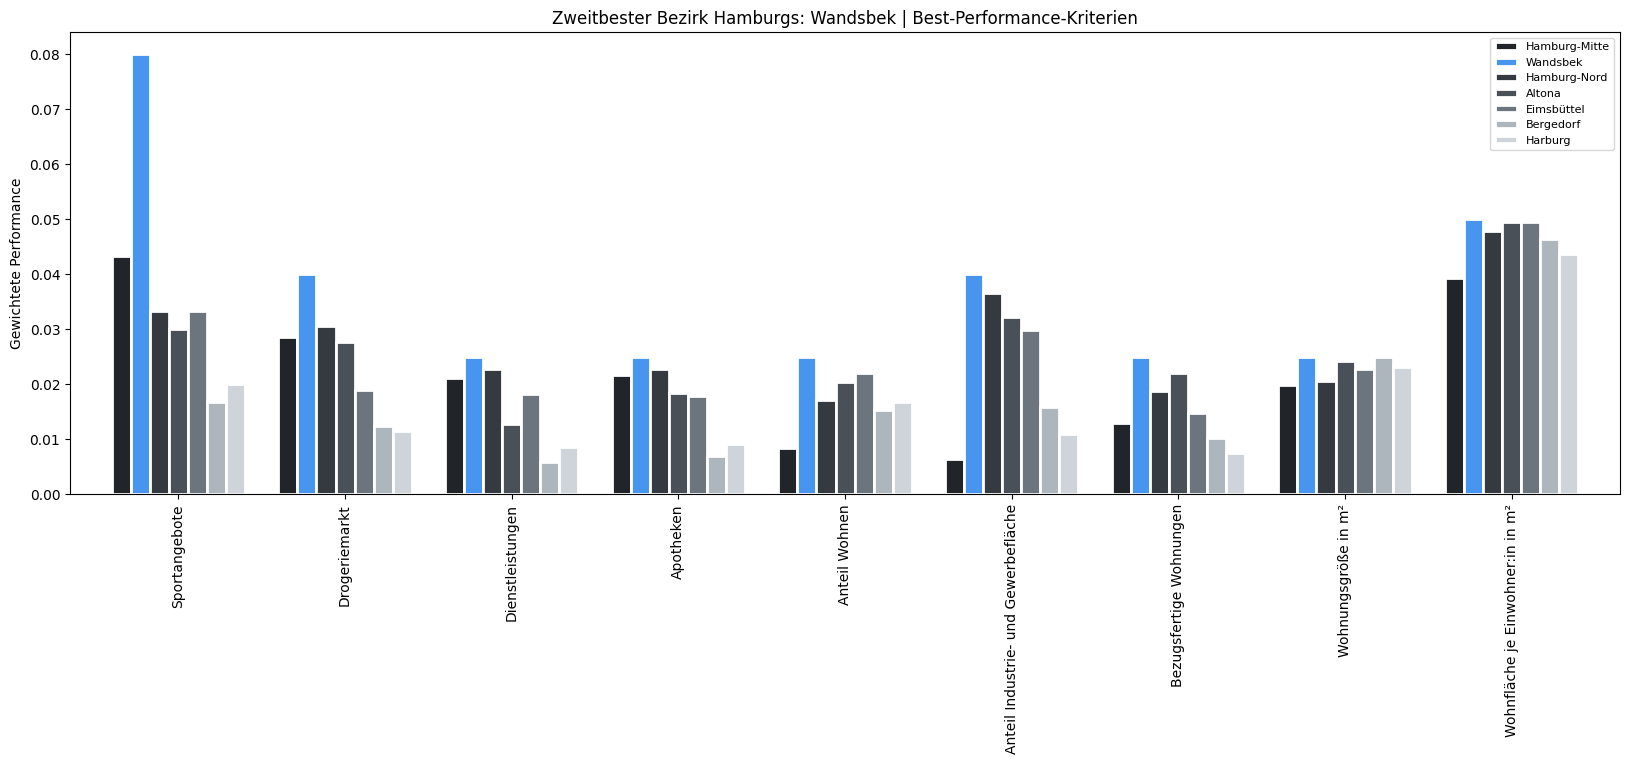

In [142]:
# why this bezirk got second best?
zweitbester_bezirk_weighted.transpose().plot.bar(color=["#212529", "#4895ef", "#343a40", "#495057", "#6c757d", "#adb5bd", "#ced4da"], figsize=(20, 6),  width=0.8, edgecolor='white', 
                                                    linewidth=2, ylabel="Gewichtete Performance", title="Zweitbester Bezirk Hamburgs: Wandsbek | Best-Performance-Kriterien")
plt.legend(loc="upper right",  prop={'size': 8})
plt.show()

In [124]:
# get all NON-ZERO weighted performance values
zero_columns = (weighted_df != 0).any()
zweitbester_bezirk_weighted_worst = weighted_df.loc[:, zero_columns]
zweitbester_bezirk_weighted_worst.drop(["Performance Score", "Rank"], axis=1, inplace=True)

# get all columns where the zweitbeste bezirk scored the best
zweitbest_columns_worst = zweitbester_bezirk_weighted_worst.idxmin(axis=0) == zweitbester_bezirk
zweitbester_bezirk_weighted_worst = zweitbester_bezirk_weighted_worst.loc[:, zweitbest_columns_worst]

# show
zweitbester_bezirk_weighted_worst = zweitbester_bezirk_weighted_worst.round(4)
zweitbester_bezirk_weighted_worst.style.apply(lambda x: ['background: #4895ef' 
                                  if (x.name == zweitbester_bezirk)
                                  else '' for i in x], axis=1)

,Anteil Gewässer,PKW-Dichte
Bezirk,,
Hamburg-Mitte,0.025000,0.040000
Wandsbek,0.001400,0.026600
Hamburg-Nord,0.003300,0.033200
Altona,0.008700,0.031700
Eimsbüttel,0.002100,0.031200
Bergedorf,0.007400,0.026600
Harburg,0.004800,0.031000


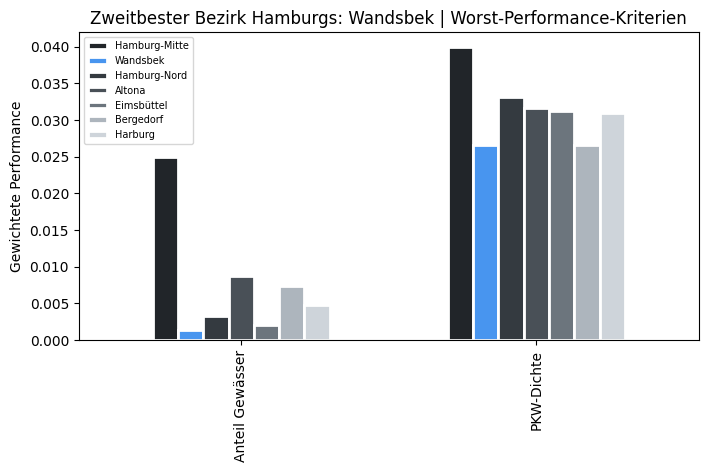

In [143]:
# which are the criteria with bad performance?
zweitbester_bezirk_weighted_worst.transpose().plot.bar(color=["#212529", "#4895ef", "#343a40", "#495057", "#6c757d", "#adb5bd", "#ced4da"], figsize=(8, 4),  width=0.6, edgecolor='white', 
                                                    linewidth=2, ylabel="Gewichtete Performance", title="Zweitbester Bezirk Hamburgs: Wandsbek | Worst-Performance-Kriterien")
plt.legend(loc="upper left",  prop={'size': 7})
plt.show()

### Review

**Hürden bei der Analyse**
- geeignetes Analyseverfahren wählen
- sehr unterschiedliches subjektives Empfinden über einzelne Attribute -> schwer "den besten Bezirk" zu verallgemeinern (deshalb Beschränkung auf unsere Sichtweise, bzw. die eines neuen Studentens)

## Zusammenfassung/Ausblick

**Nutzen**
- Entscheidungshilfe für Studierende, die neu nach Hamburg ziehen, oder über einen Wohnortwechsel nachdenken

**Erweiterungen**
- Gewichte ändern (z.B. zur Zielgruppe "Familien" oder "Senioren")
- weitere Attribute passend zur Zielgruppe hinzufügen

## Weitere Test-Versuche

### Fachlich: Polar Models
Teilweise: https://towardsdatascience.com/how-to-create-and-visualize-complex-radar-charts-f7764d0f3652

#### Models

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px

warnings.simplefilter(action='ignore', category=FutureWarning)
scaler = MinMaxScaler()

In [ ]:
# BEVÖLKERUNG

# Werte normalisieren
data = pd.DataFrame(scaler.fit_transform(data_bevoelkerung), 
            index=data_bevoelkerung.index,
            columns=data_bevoelkerung.columns)

#  Daten unipivotieren
polar = data.reset_index().round(2)
polar = pd.melt(polar,id_vars=["Bezirk"])

# Polar Plot
fig_bevölkerung = px.line_polar(polar, r="value", theta="Bevölkerung", color="Bezirk", color_discrete_sequence=["#03045E", "#023E8A", "#0077B6", "#0096C7", "#00B4D8", "#48CAE4", "#90E0EF"], line_close=True,height=500,width=1000, title="Bevölkerung")

In [ ]:
# WOHLSTAND

# Werte normalisieren
data = pd.DataFrame(scaler.fit_transform(data_wohlstand), 
            index=data_wohlstand.index,
            columns=data_wohlstand.columns)

#  Daten unipivotieren
polar = data.reset_index().round(2)
polar = pd.melt(polar,id_vars=["Bezirk"])

# Polar Plot
fig_wohlstand = px.line_polar(polar, r="value", theta="Wohlstand", color="Bezirk",  color_discrete_sequence=["#03045E", "#023E8A", "#0077B6", "#0096C7", "#00B4D8", "#48CAE4", "#90E0EF"], line_close=True,height=500,width=1000, title="Wohlstand/Bildung")

In [ ]:
# WOHNEN

data = pd.DataFrame(scaler.fit_transform(data_wohnen), 
            index=data_wohnen.index,
            columns=data_wohnen.columns)

polar = data.reset_index().round(2)
polar = pd.melt(polar,id_vars=["Bezirk"])
fig_wohnen = px.line_polar(polar, r="value", theta="Wohnen", color="Bezirk",  color_discrete_sequence=["#03045E", "#023E8A", "#0077B6", "#0096C7", "#00B4D8", "#48CAE4", "#90E0EF"], line_close=True,height=500,width=1000, title="Wohnen")

In [ ]:
# SONSTIGES

data = pd.DataFrame(scaler.fit_transform(data_rest), 
            index=data_rest.index,
            columns=data_rest.columns)

polar = data.reset_index().round(2)
polar = pd.melt(polar,id_vars=["Bezirk"])
fig_sonstiges = px.line_polar(polar, r="value", theta="Rest", color="Bezirk",  color_discrete_sequence=["#03045E", "#023E8A", "#0077B6", "#0096C7", "#00B4D8", "#48CAE4", "#90E0EF"], line_close=True,height=500,width=1000, title="Sonstiges")

In [ ]:
# NAHVERSORGUNG

data = pd.DataFrame(scaler.fit_transform(data_nahversorgung.iloc[:,:-1]), 
            index=data_nahversorgung.iloc[:,:-1].index,
            columns=data_nahversorgung.iloc[:,:-1].columns)

polar = data.reset_index().round(2)
polar = pd.melt(polar,id_vars=["Bezirk"])
fig_versorgung = px.line_polar(polar, r="value", theta="Nahversorgung", color="Bezirk",  color_discrete_sequence=["#03045E", "#023E8A", "#0077B6", "#0096C7", "#00B4D8", "#48CAE4", "#90E0EF"], line_close=True,height=500,width=1000, title="Versorgung")

In [ ]:
# Gastro

data = pd.DataFrame(scaler.fit_transform(data_gastro.iloc[:,:-1]), 
            index=data_gastro.iloc[:,:-1].index,
            columns=data_gastro.iloc[:,:-1].columns)

polar = data.reset_index().round(2)
polar = pd.melt(polar,id_vars=["Bezirk"])
fig_gastro = px.line_polar(polar, r="value", theta="Gastronomie", color="Bezirk",  color_discrete_sequence=["#03045E", "#023E8A", "#0077B6", "#0096C7", "#00B4D8", "#48CAE4", "#90E0EF"], line_close=True,height=500,width=1000, title="Gastro")

In [ ]:
# Freizeit

data = pd.DataFrame(scaler.fit_transform(data_freizeit.iloc[:,:-1]), 
            index=data_freizeit.iloc[:,:-1].index,
            columns=data_freizeit.iloc[:,:-1].columns)

polar = data.reset_index().round(2)
polar = pd.melt(polar,id_vars=["Bezirk"])
fig_freizeit = px.line_polar(polar, r="value", theta="Freizeit", color="Bezirk",  color_discrete_sequence=["#03045E", "#023E8A", "#0077B6", "#0096C7", "#00B4D8", "#48CAE4", "#90E0EF"], line_close=True,height=500,width=1000, title="Freizeit")

In [ ]:
# Bodenflächen

data = pd.DataFrame(scaler.fit_transform(data_bodenflaechen), 
            index=data_bodenflaechen.index,
            columns=data_bodenflaechen.columns)

polar = data.reset_index().round(2)
polar = pd.melt(polar,id_vars=["Bezirk"])
fig_bodenflächen = px.line_polar(polar, r="value", theta="Bodenflächen", color="Bezirk",  color_discrete_sequence=["#03045E", "#023E8A", "#0077B6", "#0096C7", "#00B4D8", "#48CAE4", "#90E0EF"], line_close=True,height=500,width=1000, title="Bodenflächen")

In [ ]:
# Siedlungsflächen

data = pd.DataFrame(scaler.fit_transform(data_siedlungsflaechen), 
            index=data_siedlungsflaechen.index,
            columns=data_siedlungsflaechen.columns)

polar = data.reset_index().round(2)
polar = pd.melt(polar,id_vars=["Bezirk"])
fig_siedlungsflächen = px.line_polar(polar, r="value", theta="Siedlungsflächen", color="Bezirk",  color_discrete_sequence=["#03045E", "#023E8A", "#0077B6", "#0096C7", "#00B4D8", "#48CAE4", "#90E0EF"], line_close=True,height=500,width=1000, title="Siedlungsflächen")

#### Dashboard

In [ ]:
import dash_bootstrap_components as dbc
from dash_bootstrap_templates import load_figure_template
from jupyter_dash import JupyterDash
from dash import dcc, html, dash_table

In [ ]:
# initialize app
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.LUX])
load_figure_template('LUX')

In [ ]:
# put graphs together
app.layout = html.Div([
    html.H1("Explorative Analyse"),
    dcc.Tabs([
        dcc.Tab(label='Bevölkerung', children=[
            dcc.Graph(figure=fig_bevölkerung), 
            dash_table.DataTable(data=data_bevoelkerung.reset_index().to_dict(orient="records"), sort_action="native")
        ]),
        dcc.Tab(label='Wohlstand/Bildung', children=[
            dcc.Graph(figure=fig_wohlstand), 
            dash_table.DataTable(data=data_wohlstand.reset_index().to_dict(orient="records"), sort_action="native")
        ]),
        dcc.Tab(label='Wohnen', children=[
            dcc.Graph(figure=fig_wohnen), 
            dash_table.DataTable(data=data_wohnen.reset_index().to_dict(orient="records"), sort_action="native")
        ]),
        dcc.Tab(label='Sonstiges', children=[
            dcc.Graph(figure=fig_sonstiges), 
            dash_table.DataTable(data=data_rest.reset_index().to_dict(orient="records"), sort_action="native")
        ]),
        dcc.Tab(label='Nahversorgung', children=[
            dcc.Graph(figure=fig_versorgung), 
            dash_table.DataTable(data=data_nahversorgung.reset_index().to_dict(orient="records"), sort_action="native")
        ]),
        dcc.Tab(label='Gastronomie', children=[
            dcc.Graph(figure=fig_gastro), 
            dash_table.DataTable(data=data_gastro.reset_index().to_dict(orient="records"), sort_action="native")
        ]),
        dcc.Tab(label='Freizeit', children=[
            dcc.Graph(figure=fig_freizeit), 
            dash_table.DataTable(data=data_freizeit.reset_index().to_dict(orient="records"), sort_action="native")
        ]),
        dcc.Tab(label='Bodenflächen', children=[
            dcc.Graph(figure=fig_bodenflächen), 
            dash_table.DataTable(data=data_bodenflaechen.reset_index().to_dict(orient="records"), sort_action="native")
        ]),
        dcc.Tab(label='Siedlungsflächen', children=[
            dcc.Graph(figure=fig_siedlungsflächen), 
            dash_table.DataTable(data=data_siedlungsflaechen.reset_index().to_dict(orient="records"), sort_action="native")
        ])
    ])
])

In [ ]:
# open in browser
app.run_server(debug=True)

Dash app running on http://127.0.0.1:8050/


In [ ]:
# open in notebook
app.run_server(mode="inline")

### Clustering

In [ ]:
from sklearn.cluster import KMeans
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
kmeans = KMeans(n_clusters=4)

cluster_df = decision_matrix

y = kmeans.fit_predict(cluster_df)

cluster_df['Cluster'] = y

cluster_df.sort_values('Cluster')

,Anzahl Einwohner:innen,Anteil U18,Anteil Ü65,Personen je Haushalt,Anteil Siedlung,Anteil Verkehr,Anteil Vegetation,Anteil Gewässer,Kulturelle Einrichtungen,Sportangebote,Restaurante/Imbisse,Kneipen/Bars,Hotels/Beherbergungen,Sonstige Gastronomie,Drogeriemarkt,Dienstleistungen,Uebriger Nahversorgungsrelevanter Anbieter,Lebensmittel,Grundschulen,Niedergelassene Ärzte:innen,Apotheken,PKW-Dichte,Anteil Wohnen,Anteil Industrie- und Gewerbefläche,"Anteil Sport-, Freizeit und Erholungsfläche",Anteil Friedhof,Arbeitslosenanteil in %,Anteil der Schüler:innen in Gymnasien in %,Bevölkerungsdichte,Bezugsfertige Wohnungen,Wohnungsgröße in m²,Wohnfläche je Einwohner:in in m²,Sozialwohnungsanteil in %,Cluster
Bezirk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Hamburg-Mitte,301231,16.2,14.3,1.8,46.28,15.56,14.24,23.93,128,26,665,442,106,31,30,1048,179,736,30,779,69,265,22.55,49.24,17.51,2.03,8.3,30.4,2117,1304,66.3,32.7,13.9,0
Hamburg-Nord,315514,13.9,16.1,1.6,67.72,26.02,3.06,3.20,16,20,327,176,11,23,32,1120,108,519,25,1068,73,319,45.92,8.55,21.82,10.06,5.3,52.5,5462,1907,68.8,39.8,4.8,0
Bergedorf,130994,18.3,18.8,2.0,25.36,6.06,61.45,7.12,20,10,63,32,4,7,13,285,66,148,18,221,22,398,40.86,19.76,22.70,0.66,5.8,38.8,847,1043,83.5,38.6,12.9,1
Harburg,169221,18.4,17.8,1.9,32.56,8.88,53.98,4.58,20,12,105,57,10,7,12,425,69,268,20,293,29,342,44.52,28.64,15.60,1.72,7.5,35.5,1353,756,77.7,36.3,9.4,1
Wandsbek,442702,17.5,21.5,1.9,57.54,11.13,29.95,1.38,39,48,256,132,27,39,42,1235,107,590,53,834,80,398,66.76,7.83,15.70,0.66,6.1,47.0,3001,2531,83.7,41.6,7.2,2
Altona,275664,18.0,17.9,1.8,61.96,12.17,17.58,8.29,28,18,230,134,15,30,29,631,79,463,31,879,59,334,54.49,9.73,21.73,2.74,6.3,51.4,3538,2228,80.9,41.2,6.5,3
Eimsbüttel,269118,15.5,18.7,1.7,67.34,18.38,12.28,2.00,24,20,302,155,17,28,20,906,71,471,29,927,57,340,58.75,10.50,17.32,0.81,5.2,57.1,5403,1500,76.3,41.2,4.0,3


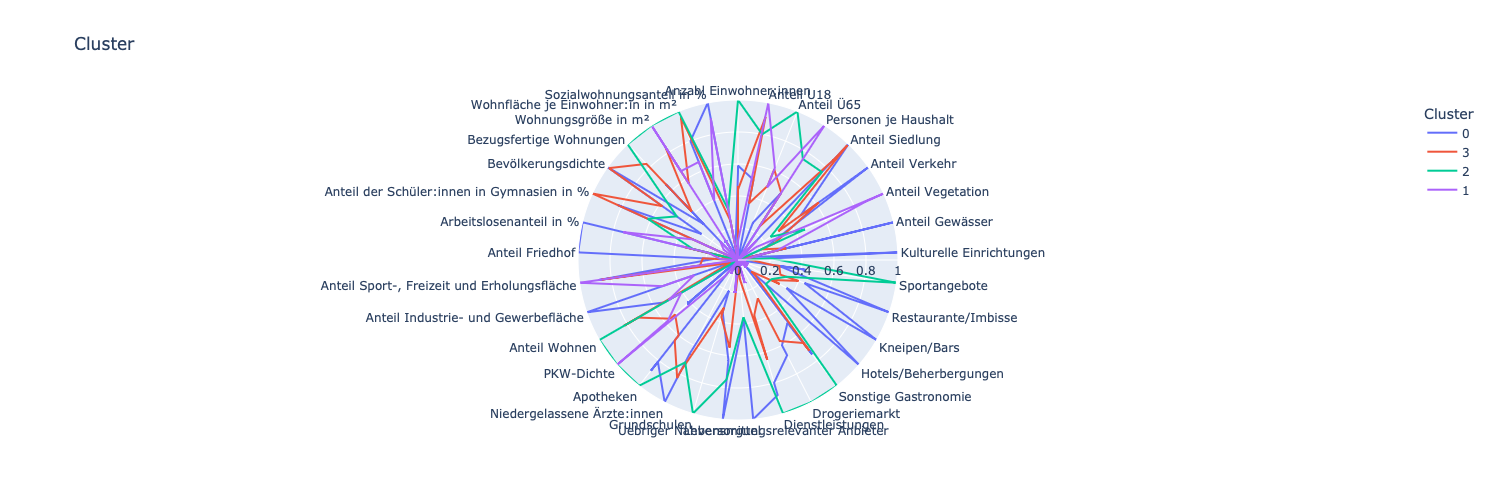

In [ ]:
df_withouthcluster = cluster_df.iloc[:,:-1]

data = pd.DataFrame(scaler.fit_transform(df_withouthcluster), 
            index=df_withouthcluster.index,
            columns=df_withouthcluster.columns)

data["Cluster"] = cluster_df["Cluster"]
polar = data.reset_index().round(2)
polar.drop("Bezirk", axis=1, inplace=True)

polar = pd.melt(polar,id_vars=["Cluster"])
fig = px.line_polar(polar, r="value", theta="variable", color="Cluster", line_close=True,height=500,width=1000, title="Cluster")
fig.show()

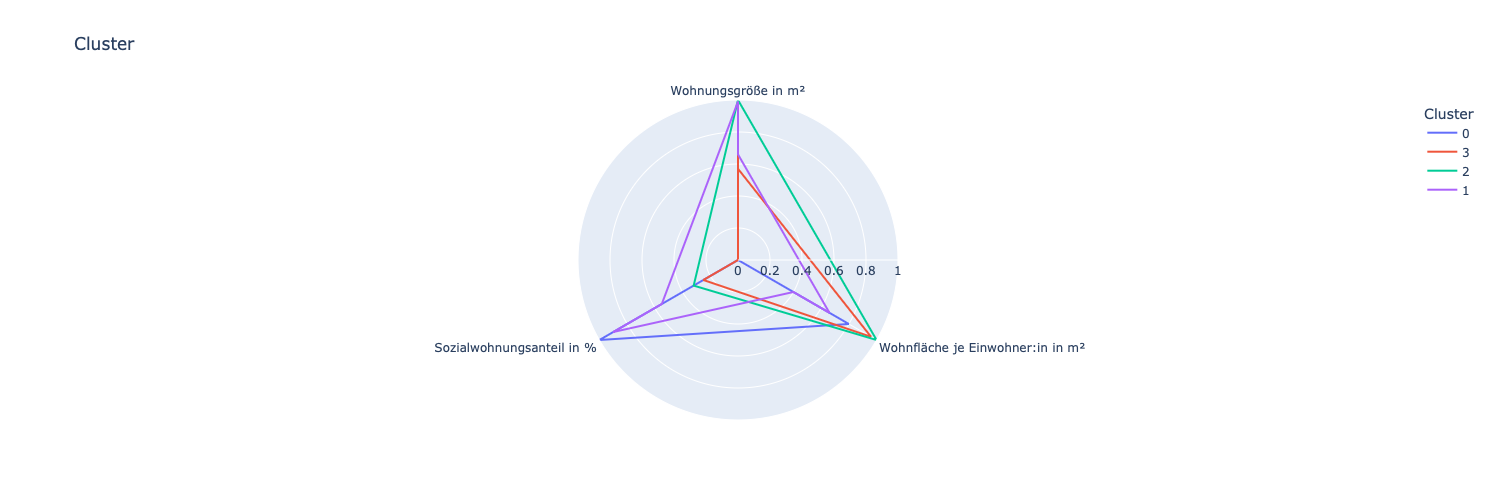

In [ ]:
df_withouthcluster = cluster_df.iloc[:,:-1]

data = pd.DataFrame(scaler.fit_transform(df_withouthcluster), 
            index=df_withouthcluster.index,
            columns=df_withouthcluster.columns)

data["Cluster"] = cluster_df["Cluster"]
polar = data.reset_index().round(2)
polar.drop("Bezirk", axis=1, inplace=True)

polar = pd.melt(polar.iloc[:,-4:],id_vars=["Cluster"])
fig = px.line_polar(polar, r="value", theta="variable", color="Cluster", line_close=True,height=500,width=1000, title="Cluster")
fig.show()

In [ ]:
kmeans = KMeans(n_clusters=2)

y = kmeans.fit_predict(data_versorgung)

data_versorgung['Cluster'] = y

data_versorgung.sort_values('Cluster')

In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data_versorgung.iloc[:,:-1]), 
            index=data_versorgung.iloc[:,:-1].index,
            columns=data_versorgung.iloc[:,:-1].columns)
data["Cluster"] = data_versorgung["Cluster"]
data

In [ ]:
kmeans = KMeans(n_clusters=3)

dfCopy_siedlung = data_siedlungsflaechen.loc[:, ["Wohnen_Anteil", "Industrie- und Gewerbefläche_Anteil", "Sport-,Freizeit und Erholungsfläche gesamt_Anteil", "Friedhof_Anteil"]]

y = kmeans.fit_predict(dfCopy_siedlung[["Wohnen_Anteil", "Industrie- und Gewerbefläche_Anteil", "Sport-,Freizeit und Erholungsfläche gesamt_Anteil", "Friedhof_Anteil"]])

dfCopy_siedlung['Cluster'] = y

dfCopy_siedlung.sort_values('Cluster')

In [ ]:
dfCopy_bodenUndSiedlung = data_siedlungsflaechen.loc[:, ["Wohnen_Anteil", "Industrie- und Gewerbefläche_Anteil", "Sport-,Freizeit und Erholungsfläche gesamt_Anteil", "Friedhof_Anteil"]].join(data_bodenflaechen.drop("Cluster", axis=1).iloc[:, 6:])
dfCopy_bodenUndSiedlung.rename_axis("Bezirk", inplace=True)
dfCopy_bodenUndSiedlung

In [ ]:
import plotly.express as px

y = kmeans.fit_predict(dfCopy_bodenUndSiedlung)

dfCopy_bodenUndSiedlung['Cluster'] = y
polar = dfCopy_bodenUndSiedlung.groupby("Cluster").mean().reset_index()
polar = pd.melt(polar,id_vars=["Cluster"])
fig = px.line_polar(polar, r="value", theta="variable", color="Cluster", line_close=True,height=500,width=1000)
fig.show()

In [ ]:
import plotly.express as px

clusters = pd.DataFrame(dfCopyBoden, columns=dfCopyBoden.drop("Cluster",axis=1).columns)

clusters['label'] = y
polar = clusters.groupby("label").mean().reset_index()
polar = pd.melt(polar,id_vars=["label"])
fig = px.line_polar(polar, r="value", theta="Bodenflächen", color="label", line_close=True,height=700,width=800)
fig.show()

In [ ]:
y

In [ ]:
kmeans = KMeans(n_clusters=3)

dfCopy2 = data_lebensmittel

y = kmeans.fit_predict(dfCopy2)

dfCopy2['Cluster'] = y

dfCopy2.sort_values('Cluster')

In [ ]:
dfCopy2.iloc[:, :-2]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(dfCopy2.iloc[:, :-2])

In [ ]:
data_versorgung_kompakt = data_freizeit.join(data_lebensmittel, lsuffix="_L", rsuffix="_R")
data_versorgung_kompakt

In [ ]:
dfCopy2.drop(["Cluster", "GESAMT"], axis=1)

In [ ]:
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

clusters=pd.DataFrame(dfCopy2,columns=dfCopy2.drop(["Cluster", "GESAMT"],axis=1).columns)

scaler = MinMaxScaler()
clusters = pd.DataFrame(scaler.fit_transform(clusters.values), columns=clusters.columns, index=clusters.index)

# clusters['label'] = y
polar=clusters.groupby("Bezirk").mean().reset_index()
polar=pd.melt(polar,id_vars=["Bezirk"])
fig = px.line_polar(polar, r="value", theta="variable", color="Bezirk", line_close=True,height=500,width=1000)
fig.show()

### Visualisation

#### Visualization tests

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data_bodenflaechen.loc["Hamburg-Mitte", "Siedlung":"Gewässer"].plot(kind='pie', title='Hamburg-Mitte')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, figsize=(10, 10), sharey=True, sharex=True)

data_versorgung.loc["Altona"].plot(kind="barh", ax=ax1, title="Altona")
data_versorgung.loc["Harburg"].plot(kind="barh", ax=ax2, title="Harburg")
data_versorgung.loc["Hamburg-Mitte"].plot(kind="barh", ax=ax3, title="Hamburg-Mitte")
data_versorgung.loc["Hamburg-Nord"].plot(kind="barh", ax=ax4, title="Hamburg-Nord")
data_versorgung.loc["Wandsbek"].plot(kind="barh", ax=ax5, title="Wandsbek")
data_versorgung.loc["Eimsbüttel"].plot(kind="barh", ax=ax6, title="Eimsbüttel")
data_versorgung.loc["Bergedorf"].plot(kind="barh", ax=ax7, title="Bergedorf")


In [ ]:
# Vergleich Apothekenanzahl (unterschiedliche Quellen)
print(data_versorgung["UEBRIGER_NAHVERSORGUNGSRELEVANTER_ANBIETER"].sum() - data_stadtteile["Apotheken (Dez 2020)"].sum())
#Vergleich Größe der Fläche (unterschiedliche Quellen)
print(data_bodenflaechen["Bodenfläche gesamt"].values.sum(), data_stadtteile["Fläche in km²"].values.sum())

In [ ]:
data_bodenflaechen.sort_values(by='Siedlung_Anteil', ascending=True).iloc[:, 6:].plot(kind='barh', 
                                    stacked=True, 
                                    color=['#a98467', '#495057', '#76c893', '#168aad'],
                                    figsize=(8,3))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          fancybox=True, shadow=True, labels=["Siedlung", "Verkehr", "Vegetation", "Gewässer"])
plt.xlabel('Anteil in %')
plt.show()

#### Interaktives Dashboard

In [ ]:
#Widgets - Interaktives Dashboard 
from ipywidgets import interactive
import ipywidgets as widgets
import matplotlib.pyplot as plt

In [ ]:
################# PLOT 1 erstellen (Bereich: Flächen) ###################################

plot_bodenFlaechen = widgets.Output()

def bodenflaechen():
    plot_bodenFlaechen.clear_output()

    with plot_bodenFlaechen:
        
        data_bodenflaechen.sort_values(by='Siedlung_Anteil', ascending=True).iloc[:, 6:].plot(kind='barh', 
                                    stacked=True, 
                                    color=['#a98467', '#495057', '#76c893', '#168aad'],
                                    figsize=(4,3))
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
                fancybox=True, shadow=True, labels=["Siedlung", "Verkehr", "Vegetation", "Gewässer"])
        plt.xlabel('Anteil in %')
        plt.title('Bodenflächen-Nutzung')
        
        # Plot zeigen
        plt.show()

In [ ]:
################# PLOT 2 erstellen (Bereich: Flächen) ###################################

plot_siedlungsFlaechen = widgets.Output()

def siedlungsflaechen():
    plot_siedlungsFlaechen.clear_output()

    with plot_siedlungsFlaechen:
        
        data_siedlungsflaechen.sort_values(by='Wohnen_Anteil', ascending=True).iloc[:, 8:].plot(kind='barh', 
                                    stacked=True, 
                                    color=['#432818', '#7f5539', '#99582a', '#b08968', '#ddb892', '#ede0d4'],
                                    figsize=(4,3))
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
                fancybox=True, shadow=True, labels=["Wohnen", "Industrie- und Gewerbeflächen", "Flächen gemischter Nutzung", "Flächen besonderer funktionaler Prägung", "Sport-,Freizeit und Erholungsfläche", "Friedhof"])
        plt.xlabel('Anteil in %')
        plt.title('Siedlungsflächen-Nutzung')
    
        # Plot zeigen
        plt.show()

In [ ]:
################# PLOT 3 erstellen (Bereich: Versorgung (Lebensmittel)) ###################################

plot_lebensmittel = widgets.Output()

def lebensmittel():
    plot_lebensmittel.clear_output()

    with plot_lebensmittel:
        
        data_lebensmittel.sort_values(by="GESAMT").iloc[:,:-1].plot(kind='barh', 
                                    stacked=True, 
                                    color=['#22223b', '#4a4e69', '#9a8c98', '#c9ada7', '#ccc5b9'],
                                    figsize=(4,3))
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
                fancybox=True, shadow=True, labels=["Discounter", "Supermarkt", "SB-Warenhaus", "Wochenmarkt", "Sonstige"])
        plt.xlabel('Anzahl')
        plt.title('Lebensmittel-Versorgung')
    
        # Plot zeigen
        plt.show()

In [ ]:
################# PLOT 4 erstellen (Bereich: Versorgung (Sonstige Nahversorgung)) ###################################

plot_nahversorgung = widgets.Output()

def nahversorgung():
    plot_nahversorgung.clear_output()

    with plot_nahversorgung:
        
        data_nahversorgung.sort_values(by="GESAMT").iloc[:,:-1].plot(kind='barh', 
                                    stacked=True, 
                                    color=['#22223b', '#4a4e69', '#9a8c98', '#c9ada7', '#ccc5b9'],
                                    figsize=(4,3))
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
                fancybox=True, shadow=True, labels=["Drogerie", "Dienstleistung", "Sonstige"])
        plt.xlabel('Anzahl')
        plt.title('Sonstige Nahversorgung')
    
        # Plot zeigen
        plt.show()

In [ ]:
################# PLOT 5 erstellen (Bereich: Versorgung (Freizeit)) ###################################

plot_freizeit = widgets.Output()

def freizeit():
    plot_freizeit.clear_output()

    with plot_freizeit:
        
        data_freizeit.sort_values(by="GESAMT").iloc[:,:-1].plot(kind='barh', 
                                    stacked=True, 
                                    color=['#22223b', '#4a4e69', '#9a8c98', '#c9ada7', '#ccc5b9'],
                                    figsize=(4,3))
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
                fancybox=True, shadow=True, labels=["Kulturelle Einrichtung", "Sport"])
        plt.xlabel('Anzahl')
        plt.title('Freizeitangebote')
    
        # Plot zeigen
        plt.show()

In [ ]:
################# PLOT 6 erstellen (Bereich: Versorgung (Gastro)) ###################################

plot_gastro = widgets.Output()

def gastro():
    plot_gastro.clear_output()

    with plot_gastro:
        
        # Werte normalisieren
        data = pd.DataFrame(scaler.fit_transform(data_bevoelkerung), 
                    index=data_bevoelkerung.index,
                    columns=data_bevoelkerung.columns)

        #  Daten unipivotieren
        polar = data.reset_index()
        polar = pd.melt(polar,id_vars=["Bezirk"])

        # Polar Plot
        fig = px.line_polar(polar, r="value", theta="variable", color="Bezirk", line_close=True,height=500,width=1000, title="Bevölkerung")
        fig.show()

In [ ]:
################## DASHBOARD ANZEIGEN ###############################

# # Tabs konfigurieren
flächen_box = widgets.HBox([plot_bodenFlaechen, plot_siedlungsFlaechen])
versorgung_subbox = widgets.HBox([plot_lebensmittel, plot_nahversorgung])
versorgung_subbox_2 = widgets.HBox([plot_freizeit, plot_gastro])
versorgung_box = widgets.VBox([versorgung_subbox, versorgung_subbox_2])
tab = widgets.Tab([flächen_box, versorgung_box])
tab.set_title(0, 'Flächen')
tab.set_title(1, 'Versorgung')

# # Plots ausführen
bodenflaechen()
siedlungsflaechen()
lebensmittel()
nahversorgung()
freizeit()
gastro()

# # Tabs anrichten und Dashboard anzeigen
dashboard = widgets.VBox([tab])
display(dashboard)